### Adverse event analysis

Python 3.5.2

### Data Description

The FDA&#39;s database of adverse event reports is made available through a web API at

https://open.fda.gov/drug/event/. Each report contains general information about the report,

patient information, a list of the drugs that the patient is taking, and a list of the patient reactions.  It

is possible to use these data in many ways: your brief is to explore these data and to see what might

be learned from them. 


### Task

As a guide, for the present work I have investigated the following questions: 

 
        What drugs tend to be taken together?
        
        Are different adverse events reported in different countries? 
        
        
I have used 10 files from 2015 reports  (2015 Q4 (part 1 till part 10))      
        

In the first section of this notebook, the names of the drugs associated with each event are retrieved, stored as a transactional datbase (drug_event_clean.csv) and finally processed in R (see association_rules.ipynb) to find association rules of drugs. 

In the second, the difference of adverse events by countries is investigated

In [2]:
# Loading libraries

import json
import random

import pandas as pd
import numpy as np



from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
pwd

'C:\\Users\\Dekou\\Desktop\\Astrazeneca'

In [4]:

file_list_len = 11


for i in range(1,file_list_len):
    
    json_file = 'drug-event-%0.4d-of-0020.json'%i
    
    
    json_data = open(json_file)
    
    data = json.load(json_data)
    
    print(json_file, i)
    
    if i !=1: 
                 
        ev_country_dat = pd.concat([ev_country_dat , pd.DataFrame(data['results'])], ignore_index=True)
        
    else:
        ev_country_dat = pd.DataFrame(data['results'])
            
   

drug-event-0001-of-0020.json 1
drug-event-0002-of-0020.json 2
drug-event-0003-of-0020.json 3
drug-event-0004-of-0020.json 4
drug-event-0005-of-0020.json 5
drug-event-0006-of-0020.json 6
drug-event-0007-of-0020.json 7
drug-event-0008-of-0020.json 8
drug-event-0009-of-0020.json 9
drug-event-0010-of-0020.json 10


In [5]:
ev_country_dat.shape

(150000, 27)

In [6]:
ev_country_dat.head(5)

,authoritynumb,companynumb,duplicate,fulfillexpeditecriteria,occurcountry,patient,primarysource,primarysourcecountry,receiptdate,receiptdateformat,...,sender,serious,seriousnesscongenitalanomali,seriousnessdeath,seriousnessdisabling,seriousnesshospitalization,seriousnesslifethreatening,seriousnessother,transmissiondate,transmissiondateformat
0,NaN,JP-AMGEN-JPNSP2015061325,1,1,JP,"{'patientagegroup': '6', 'patientsex': '1', 'd...","{'reportercountry': 'JP', 'qualification': '1'}",JP,20151021,102,...,"{'senderorganization': 'FDA-Public Use', 'send...",1,NaN,NaN,NaN,1,NaN,NaN,20160304,102
1,NaN,PHJP2015JP011480,1,1,JP,{'summary': {'narrativeincludeclinical': 'CASE...,"{'reportercountry': 'JP', 'qualification': '1'}",JP,20151116,102,...,"{'senderorganization': 'FDA-Public Use', 'send...",1,NaN,NaN,NaN,NaN,NaN,1,20160304,102
2,NaN,CA-UCBSA-2015024806,1,1,CA,{'summary': {'narrativeincludeclinical': 'CASE...,"{'reportercountry': 'CA', 'qualification': '3'}",CA,20151007,102,...,"{'senderorganization': 'FDA-Public Use', 'send...",1,NaN,NaN,NaN,1,NaN,NaN,20160304,102
3,NaN,CH-LPDUSPRD-20150629,1,1,DE,{'summary': {'narrativeincludeclinical': 'CASE...,"{'reportercountry': 'CH', 'qualification': '3'}",CH,20151102,102,...,"{'senderorganization': 'FDA-Public Use', 'send...",2,NaN,NaN,NaN,NaN,NaN,NaN,20160304,102
4,NaN,US-BAXTER-2015BAX049765,1,2,US,"{'drug': [{'actiondrug': '5', 'activesubstance...","{'reportercountry': 'US', 'qualification': '5'}",US,20151001,102,...,"{'senderorganization': 'FDA-Public Use', 'send...",1,NaN,NaN,NaN,NaN,NaN,1,20160304,102


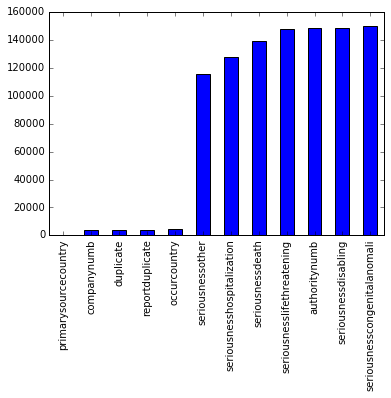

In [7]:

missing = ev_country_dat.isnull().sum()

missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

There is no missing value in the patient column of interest here 

From data description we know that: 

    - A report may list several drug products, as well as several patient reactions. 
    

### Part 1)

We are interest in storing the drugs taken by each patient

In [8]:
patients = ev_country_dat[['patient']]

In [9]:
patients

,patient
0,"{'patientagegroup': '6', 'patientsex': '1', 'd..."
1,{'summary': {'narrativeincludeclinical': 'CASE...
2,{'summary': {'narrativeincludeclinical': 'CASE...
3,{'summary': {'narrativeincludeclinical': 'CASE...
4,"{'drug': [{'actiondrug': '5', 'activesubstance..."
5,{'summary': {'narrativeincludeclinical': 'CASE...
6,"{'drug': [{'actiondrug': '4', 'activesubstance..."
7,"{'drug': [{'drugauthorizationnumb': '103677', ..."
8,"{'patientagegroup': '5', 'patientsex': '1', 'd..."
9,"{'drug': [{'drugcharacterization': '1', 'drugs..."


Removing duplicates

In [10]:
sLength = len(patients['patient'])


patients['patient_str'] = pd.Series(np.zeros(sLength), index=patients.index)

C:\Users\Dekou\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
patients.patient_str = patients.patient.astype('str')

C:\Users\Dekou\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
patients = patients.drop_duplicates('patient_str')

In [13]:
patients.shape

(146108, 2)

In [14]:
patients =  patients.drop(['patient_str'], axis=1)

Getting the drug items

In [15]:
sLength = len(patients['patient'])

patients['drugs'] = pd.Series(np.zeros(sLength), index=patients.index)

In [16]:
for i in patients.index:
 patients.drugs[i] = patients.patient[i]['drug']

C:\Users\Dekou\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Dekou\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
patients

,patient,drugs
0,"{'patientagegroup': '6', 'patientsex': '1', 'd...","[{'drugseparatedosagenumb': '1', 'drugstructur..."
1,{'summary': {'narrativeincludeclinical': 'CASE...,"[{'drugseparatedosagenumb': '3', 'drugstartdat..."
2,{'summary': {'narrativeincludeclinical': 'CASE...,"[{'drugenddate': '201507', 'drugseparatedosage..."
3,{'summary': {'narrativeincludeclinical': 'CASE...,"[{'drugenddate': '20151007', 'drugcharacteriza..."
4,"{'drug': [{'actiondrug': '5', 'activesubstance...","[{'actiondrug': '5', 'activesubstance': {'acti..."
5,{'summary': {'narrativeincludeclinical': 'CASE...,"[{'drugauthorizationnumb': '203159', 'drugdosa..."
6,"{'drug': [{'actiondrug': '4', 'activesubstance...","[{'actiondrug': '4', 'activesubstance': {'acti..."
7,"{'drug': [{'drugauthorizationnumb': '103677', ...","[{'drugauthorizationnumb': '103677', 'activesu..."
8,"{'patientagegroup': '5', 'patientsex': '1', 'd...","[{'drugcharacterization': '1', 'activesubstanc..."
9,"{'drug': [{'drugcharacterization': '1', 'drugs...","[{'drugcharacterization': '1', 'drugstartdatef..."


In [18]:


#patients.drugs[11440]

In [19]:
len(patients.drugs[15])

3

In [20]:
patients.drugs[15][0:3]

[{'actiondrug': '1',
  'activesubstance': {'activesubstancename': 'CALCIUM CHLORIDE\\DEXTROSE\\MAGNESIUM CHLORIDE\\SODIUM CHLORIDE\\SODIUM LACTATE'},
  'drugadministrationroute': '033',
  'drugauthorizationnumb': '017512',
  'drugcharacterization': '1',
  'drugdosageform': 'SOLUTION FOR PERITONEAL DIALYSIS',
  'drugindication': 'CHRONIC KIDNEY DISEASE',
  'medicinalproduct': 'DIANEAL LOW CALCIUM PERITONEAL DIALYSIS SOLUTION WITH DEXTROSE'},
 {'actiondrug': '4',
  'activesubstance': {'activesubstancename': 'CALCIUM CHLORIDE\\DEXTROSE\\MAGNESIUM CHLORIDE\\SODIUM CHLORIDE\\SODIUM LACTATE'},
  'drugadministrationroute': '033',
  'drugauthorizationnumb': '017512',
  'drugcharacterization': '1',
  'drugdosageform': 'SOLUTION FOR PERITONEAL DIALYSIS',
  'drugindication': 'CHRONIC KIDNEY DISEASE',
  'medicinalproduct': 'DIANEAL LOW CALCIUM PERITONEAL DIALYSIS SOLUTION WITH DEXTROSE'},
 {'actiondrug': '1',
  'activesubstance': {'activesubstancename': 'CALCIUM CHLORIDE\\DEXTROSE\\MAGNESIUM CHLOR



patient.drug.medicinalproduct: Drug name. This may be the valid trade name of the product (such as ADVIL or ALEVE) or the generic name (such as IBUPROFEN). 

Limitation: this field is not systematically normalized. It may contain misspellings or idiosyncratic descriptions of drugs, such as combination products such as those used for birth control.


In [21]:


sLength = len(patients['drugs'])


Get the maximum number of drugs used by a single patient

In [22]:
#max number of drugs
max_drug = 0

for i in patients.index:
    
    if len(patients.drugs[i]) > max_drug :
        max_drug = len(patients.drugs[i])
        
print('max number of drugs for a single patient', max_drug)        

max number of drugs for a single patient 81


Prepare transactional data

Create a column for each potential drug taken

In [23]:
for i in range(1, max_drug + 1):

    drug_i = 'Drug%s'%i
    patients[drug_i] = pd.Series(index=patients.index)


In [24]:
patients.head(3)

,patient,drugs,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,...,Drug72,Drug73,Drug74,Drug75,Drug76,Drug77,Drug78,Drug79,Drug80,Drug81
0,"{'patientagegroup': '6', 'patientsex': '1', 'd...","[{'drugseparatedosagenumb': '1', 'drugstructur...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'summary': {'narrativeincludeclinical': 'CASE...,"[{'drugseparatedosagenumb': '3', 'drugstartdat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'summary': {'narrativeincludeclinical': 'CASE...,"[{'drugenddate': '201507', 'drugseparatedosage...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill the newly created columns with drug items used by each patient. 


In [25]:
for i in  patients.index:
   
   #print(i)
   if len(patients.drugs[i])>1: #we need at least 2 drugs items in a row
    
     products = []
        
     for j in range(len(patients.drugs[i])): 
        
        
        products.append(patients.drugs[i][j]['medicinalproduct']
                        .replace(",", "")
                        .strip())      
        
                 
        
     #Quick check if some products are commonly used together
     
     val =  'BCG FOR IMMUNOTHERAPY' #'ATARAX', 'SIFROL'
     if val in products:
            print (np.unique(products))
     
     
                        
     temp = [x.rstrip() for x in (np.unique(products))] #we need distinct drug items
     

     if len(temp)>1: 
         
         for l in  range(1, len(temp)+1):

            drug_l = 'Drug%s'%l
            patients.loc[i, drug_l] = temp[l-1]
        

['BCG FOR IMMUNOTHERAPY' 'IMMUNOBLADDER']
['BCG FOR IMMUNOTHERAPY']
['BCG FOR IMMUNOTHERAPY']
['BCG FOR IMMUNOTHERAPY' 'IMMUNOBLADDER']
['BCG FOR IMMUNOTHERAPY']
['BCG FOR IMMUNOTHERAPY' 'IMMUNOBLADDER']
['BCG FOR IMMUNOTHERAPY']
['BCG FOR IMMUNOTHERAPY']
['BCG FOR IMMUNOTHERAPY']
['BCG FOR IMMUNOTHERAPY']
['BCG FOR IMMUNOTHERAPY']
['BCG FOR IMMUNOTHERAPY']
['BCG FOR IMMUNOTHERAPY' 'IMMUNOBLADDER']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFERON ALFA-2B']
['BCG FOR IMMUNOTHERAPY' 'INTERFER

For instance, here we can see that BCG FOR IMMUNOTHERAPY is frequently associated with IMMUNOBLADDER and INTERFERON ALFA-2B

In [26]:
patients.head(5)

,patient,drugs,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,...,Drug72,Drug73,Drug74,Drug75,Drug76,Drug77,Drug78,Drug79,Drug80,Drug81
0,"{'patientagegroup': '6', 'patientsex': '1', 'd...","[{'drugseparatedosagenumb': '1', 'drugstructur...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'summary': {'narrativeincludeclinical': 'CASE...,"[{'drugseparatedosagenumb': '3', 'drugstartdat...",ONBREZ INHALATION CAPSUL,SEIHAITO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'summary': {'narrativeincludeclinical': 'CASE...,"[{'drugenddate': '201507', 'drugseparatedosage...",CERTOLIZUMAB PEGOL RA,PANTOLOC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'summary': {'narrativeincludeclinical': 'CASE...,"[{'drugenddate': '20151007', 'drugcharacteriza...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'drug': [{'actiondrug': '5', 'activesubstance...","[{'actiondrug': '5', 'activesubstance': {'acti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
a= 11440


patients.drugs[a]

[{'activesubstance': {'activesubstancename': 'CISPLATIN'},
  'drugadministrationroute': '065',
  'drugauthorizationnumb': '074735',
  'drugbatchnumb': 'UNKNOWN',
  'drugcharacterization': '1',
  'drugdosageform': 'UNKNOWN',
  'drugindication': 'TRANSITIONAL CELL CARCINOMA',
  'drugrecurreadministration': '3',
  'medicinalproduct': 'CISPLATIN (MANUFACTURER UNKNOWN)'},
 {'activesubstance': {'activesubstancename': 'METHOTREXATE'},
  'drugadministrationroute': '065',
  'drugauthorizationnumb': '040263',
  'drugbatchnumb': 'UNKNOWN',
  'drugcharacterization': '1',
  'drugdosageform': 'UNKNOWN',
  'drugindication': 'TRANSITIONAL CELL CARCINOMA',
  'drugrecurreadministration': '3',
  'medicinalproduct': 'METHOTREXATE (MANUFACTURER UNKNOWN)'},
 {'activesubstance': {'activesubstancename': 'VINBLASTINE'},
  'drugadministrationroute': '065',
  'drugauthorizationnumb': '089515',
  'drugbatchnumb': 'UNKNOWN',
  'drugcharacterization': '1',
  'drugdosageform': 'UNKNOWN',
  'drugindication': 'TRANSIT

In [28]:
patients.loc[a].head()

patient    {'drug': [{'drugauthorizationnumb': '074735', ...
drugs      [{'drugauthorizationnumb': '074735', 'activesu...
Drug1                       CISPLATIN (MANUFACTURER UNKNOWN)
Drug2                     DOXORUBICIN (MANUFACTURER UNKNOWN)
Drug3                    METHOTREXATE (MANUFACTURER UNKNOWN)
Name: 11440, dtype: object

Dropping unecessary columns

In [29]:
patients = patients.drop(['patient','drugs'], axis=1)

In [30]:
patients.head(5)

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug9,Drug10,...,Drug72,Drug73,Drug74,Drug75,Drug76,Drug77,Drug78,Drug79,Drug80,Drug81
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ONBREZ INHALATION CAPSUL,SEIHAITO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CERTOLIZUMAB PEGOL RA,PANTOLOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Keeps only the rows containing at least two elements

In [31]:
patients_clean = patients[patients.Drug2.notnull()]

In [32]:
len(patients_clean)

28155

In [33]:
patients_clean.head(4)

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug9,Drug10,...,Drug72,Drug73,Drug74,Drug75,Drug76,Drug77,Drug78,Drug79,Drug80,Drug81
1,ONBREZ INHALATION CAPSUL,SEIHAITO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CERTOLIZUMAB PEGOL RA,PANTOLOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BCG FOR IMMUNOTHERAPY,IMMUNOBLADDER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,ESIDREX,PANTOPRAZOLO MYLAN 20MG GASTRORESISTANT TABLET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
patients_clean.tail(5)

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug9,Drug10,...,Drug72,Drug73,Drug74,Drug75,Drug76,Drug77,Drug78,Drug79,Drug80,Drug81
149985,ATORVASTATIN,CARBOCISTEINE,RELVAR ELLIPTA,UNIPHYLLIN CONTINUS,VENTOLIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149988,ABACAVIR SULPHATE+LAMIVUDINE+ZIDOVUDINE TABLET,VIRAMUNE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149989,TAMSULOSIN HCL,XARELTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149995,CARBOPLATIN.,CYCLOPHOSPHAMIDE.,DOXORUBICIN,ETOPOSIDE.,IFOSFAMIDE.,PEGFILGRASTIM,PREDNISOLONE.,RITUXIMAB,VINCRISTINE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149999,LOSARTAN.,XARELTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's save the dataframe in a .csv file

In [35]:
patients_clean.to_csv('./drug_event_clean.csv', index= False)

Checking wether the dataframe was stored correctly

In [36]:
patient_verif = pd.read_csv('./drug_event_clean.csv') 

C:\Users\Dekou\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
patient_verif.tail(5)

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug9,Drug10,...,Drug72,Drug73,Drug74,Drug75,Drug76,Drug77,Drug78,Drug79,Drug80,Drug81
28150,ATORVASTATIN,CARBOCISTEINE,RELVAR ELLIPTA,UNIPHYLLIN CONTINUS,VENTOLIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28151,ABACAVIR SULPHATE+LAMIVUDINE+ZIDOVUDINE TABLET,VIRAMUNE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28152,TAMSULOSIN HCL,XARELTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28153,CARBOPLATIN.,CYCLOPHOSPHAMIDE.,DOXORUBICIN,ETOPOSIDE.,IFOSFAMIDE.,PEGFILGRASTIM,PREDNISOLONE.,RITUXIMAB,VINCRISTINE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28154,LOSARTAN.,XARELTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
del patients
del patients_clean
del patient_verif


### Part 2)

I will compare the adverse events by the country

In [39]:
ev_country_dat.head(5)

,authoritynumb,companynumb,duplicate,fulfillexpeditecriteria,occurcountry,patient,primarysource,primarysourcecountry,receiptdate,receiptdateformat,...,sender,serious,seriousnesscongenitalanomali,seriousnessdeath,seriousnessdisabling,seriousnesshospitalization,seriousnesslifethreatening,seriousnessother,transmissiondate,transmissiondateformat
0,NaN,JP-AMGEN-JPNSP2015061325,1,1,JP,"{'patientagegroup': '6', 'patientsex': '1', 'd...","{'reportercountry': 'JP', 'qualification': '1'}",JP,20151021,102,...,"{'senderorganization': 'FDA-Public Use', 'send...",1,NaN,NaN,NaN,1,NaN,NaN,20160304,102
1,NaN,PHJP2015JP011480,1,1,JP,{'summary': {'narrativeincludeclinical': 'CASE...,"{'reportercountry': 'JP', 'qualification': '1'}",JP,20151116,102,...,"{'senderorganization': 'FDA-Public Use', 'send...",1,NaN,NaN,NaN,NaN,NaN,1,20160304,102
2,NaN,CA-UCBSA-2015024806,1,1,CA,{'summary': {'narrativeincludeclinical': 'CASE...,"{'reportercountry': 'CA', 'qualification': '3'}",CA,20151007,102,...,"{'senderorganization': 'FDA-Public Use', 'send...",1,NaN,NaN,NaN,1,NaN,NaN,20160304,102
3,NaN,CH-LPDUSPRD-20150629,1,1,DE,{'summary': {'narrativeincludeclinical': 'CASE...,"{'reportercountry': 'CH', 'qualification': '3'}",CH,20151102,102,...,"{'senderorganization': 'FDA-Public Use', 'send...",2,NaN,NaN,NaN,NaN,NaN,NaN,20160304,102
4,NaN,US-BAXTER-2015BAX049765,1,2,US,"{'drug': [{'actiondrug': '5', 'activesubstance...","{'reportercountry': 'US', 'qualification': '5'}",US,20151001,102,...,"{'senderorganization': 'FDA-Public Use', 'send...",1,NaN,NaN,NaN,NaN,NaN,1,20160304,102


In [40]:
ev_country_dat.shape



(150000, 27)

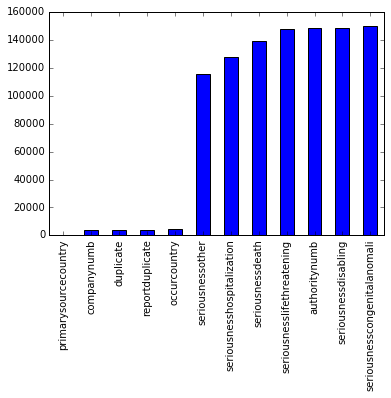

In [41]:
missing = ev_country_dat.isnull().sum()

missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

From the data description we have the following correspondence:


seriousnessdeath: 1 if the adverse event resulted in death, and absent otherwise.

seriousnessdisabling:  1 if the adverse event resulted in disability, and absent otherwise.

seriousnesshospitalization: 1 if the adverse event resulted in a hospitalization, and absent otherwise.

seriousnesslifethreatening:  1 if the adverse event resulted in a life threatening condition, and absent otherwise.

seriousnessother: 1 if the adverse event resulted in some other serious condition, and absent otherwise.


In [42]:
ev_country_dat.columns

Index(['authoritynumb', 'companynumb', 'duplicate', 'fulfillexpeditecriteria',
       'occurcountry', 'patient', 'primarysource', 'primarysourcecountry',
       'receiptdate', 'receiptdateformat', 'receivedate', 'receivedateformat',
       'receiver', 'reportduplicate', 'reporttype', 'safetyreportid',
       'safetyreportversion', 'sender', 'serious',
       'seriousnesscongenitalanomali', 'seriousnessdeath',
       'seriousnessdisabling', 'seriousnesshospitalization',
       'seriousnesslifethreatening', 'seriousnessother', 'transmissiondate',
       'transmissiondateformat'],
      dtype='object')

Columns which are not meaningfull for comparing adverse events across countries can be dropped

In [43]:
ev_country_dat = ev_country_dat.drop(['authoritynumb', 'companynumb', 'duplicate', 'fulfillexpeditecriteria',
                    'receiptdate', 'receiptdateformat', 'receivedate', 'receivedateformat',
                    'receiver' , 'reportduplicate', 'reporttype', 'sender', 'transmissiondate',
                    'transmissiondateformat', 'primarysource'], axis= 1)

Note that the primarysource columns could have been included but there are missing values within the qualification key which can't be imputed.

The primarysource.reportercountry key (Country from which the report was submitted) is assumed to be the same as primarysourcecountry (Country of the reporter of the event) and I have kept only this last one for the comparison and for efficiency. 

In [44]:
ev_country_dat.shape

(150000, 12)

Fill missing "seriousness" columns with zero

In [45]:
slist = ['seriousnesscongenitalanomali', 'seriousnessdeath',
       'seriousnessdisabling', 'seriousnesshospitalization',
       'seriousnesslifethreatening', 'seriousnessother']

for i in range(len(slist)):
    
    ev_country_dat.loc[ev_country_dat[slist[i]].isnull(), slist[i]] = 0
    

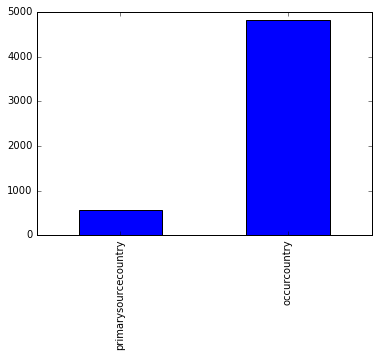

In [46]:
missing = ev_country_dat.isnull().sum()

missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [47]:
ev_country_dat.head(5)

,occurcountry,patient,primarysourcecountry,safetyreportid,safetyreportversion,serious,seriousnesscongenitalanomali,seriousnessdeath,seriousnessdisabling,seriousnesshospitalization,seriousnesslifethreatening,seriousnessother
0,JP,"{'patientagegroup': '6', 'patientsex': '1', 'd...",JP,11213184,3,1,0,0,0,1,0,0
1,JP,{'summary': {'narrativeincludeclinical': 'CASE...,JP,11269699,2,1,0,0,0,0,0,1
2,CA,{'summary': {'narrativeincludeclinical': 'CASE...,CA,11361445,3,1,0,0,0,1,0,0
3,DE,{'summary': {'narrativeincludeclinical': 'CASE...,CH,11420979,2,2,0,0,0,0,0,0
4,US,"{'drug': [{'actiondrug': '5', 'activesubstance...",US,11490756,2,1,0,0,0,0,0,1


In [48]:
ev_country_dat.columns

Index(['occurcountry', 'patient', 'primarysourcecountry', 'safetyreportid',
       'safetyreportversion', 'serious', 'seriousnesscongenitalanomali',
       'seriousnessdeath', 'seriousnessdisabling',
       'seriousnesshospitalization', 'seriousnesslifethreatening',
       'seriousnessother'],
      dtype='object')

safetyreportversion: the version number of the safetyreportid. Multiple versions of the same report may exist, it is generally best to only count the latest report and disregard others. openFDA will only return the latest version of a report.


Finding index of duplicated report id if present...

safetyreportid: The 8-digit Safety Report ID number, also known as the case report number or case ID. The first 7 digits (before the hyphen) identify an individual report and the last digit (after the hyphen) is a checksum. ''This field can be used to identify or find a specific adverse event report.''



In [49]:
ev_country_dat['safetyreportid'].describe()

count       150000
unique      150000
top       11761028
freq             1
Name: safetyreportid, dtype: object

In this case all the reported IDs are unique. Hence we dont need the safetyreportversion nor the id anymore.

In [50]:
ev_country_dat = ev_country_dat.drop(['safetyreportversion'], axis=1)
ev_country_dat = ev_country_dat.drop(['safetyreportid'], axis=1)

In [51]:
ev_country_dat.head(5)

,occurcountry,patient,primarysourcecountry,serious,seriousnesscongenitalanomali,seriousnessdeath,seriousnessdisabling,seriousnesshospitalization,seriousnesslifethreatening,seriousnessother
0,JP,"{'patientagegroup': '6', 'patientsex': '1', 'd...",JP,1,0,0,0,1,0,0
1,JP,{'summary': {'narrativeincludeclinical': 'CASE...,JP,1,0,0,0,0,0,1
2,CA,{'summary': {'narrativeincludeclinical': 'CASE...,CA,1,0,0,0,1,0,0
3,DE,{'summary': {'narrativeincludeclinical': 'CASE...,CH,2,0,0,0,0,0,0
4,US,"{'drug': [{'actiondrug': '5', 'activesubstance...",US,1,0,0,0,0,0,1


In [52]:
ev_country_dat.shape

(150000, 10)

patient.patientonsetage: age of the patient when the event first occured.

patient.patientsex: the sex of the patient.

patient.drug.drugcharacterization: reported role of the drug in the adverse event report. These values are not validated by FDA.

patient.drug.drugtreatmentduration:  the interval of the field drugtreatmentdurationunit for which the patient was taking the drug.

patient.reaction.reactionoutcome: outcome of the reaction in reactionmeddrapt at the time of last observation

In [53]:
sLength = len(ev_country_dat['patient'])

ev_country_dat['patientage'] = pd.Series(np.zeros(sLength), index=ev_country_dat.index)
ev_country_dat['patientsex'] = pd.Series(np.zeros(sLength), index=ev_country_dat.index)
#ev_country_dat['drug_characterization'] = pd.Series(np.zeros(sLength), index=ev_country_dat.index)
#ev_country_dat['drug_treatmentduration'] = pd.Series(np.zeros(sLength), index=ev_country_dat.index)
ev_country_dat['reaction_outcome'] = pd.Series(np.zeros(sLength), index=ev_country_dat.index)

ev_country_dat['same_country'] = pd.Series(np.zeros(sLength), index=ev_country_dat.index)

In [54]:
for i in ev_country_dat.index:

 if ('reactionoutcome' in ev_country_dat.patient[i]['reaction'][0]): 
   
  if ('patientonsetage' in ev_country_dat.patient[i] ) :
       
    if ('patientsex' in ev_country_dat.patient[i] ): 
     #if ('drugcharacterization' in ev_country_dat.patient[i]['drug'][0]):
      #if ('drugtreatmentduration' in  ev_country_dat.patient[i]['drug'][0]): 
            
           #print(i)  
           ev_country_dat.loc[i, 'patientage'] = ev_country_dat.patient[i]['patientonsetage']
           ev_country_dat.loc[i, 'patientsex'] = ev_country_dat.patient[i]['patientsex']
    
           #ev_country_dat.drug_characterization[i] = ev_country_dat.patient[i]['drug'][0]['drugcharacterization'] #only the first drug
           #ev_country_dat.drug_treatmentduration[i] = ev_country_dat.patient[i]['drug'][0]['drugtreatmentduration']
    
           if ev_country_dat.occurcountry[i] == ev_country_dat.primarysourcecountry[i]:
              ev_country_dat.loc[i, 'same_country'] = 1
    
           reacts = []
        
           for j in range(len(ev_country_dat.patient[i]['reaction'])): 
      
        
              if  'reactionoutcome' in ev_country_dat.patient[i]['reaction'][j]:
                    reacts.append(ev_country_dat.patient[i]['reaction'][j]['reactionoutcome'])
        
           ev_country_dat.loc[i, 'reaction_outcome'] = str(np.sort(np.unique(reacts)))[1:-1] 

The reactionoutcome and the drugtreatmentduration rarely occur together within the dataset, this is another limitation encountered.

In [55]:
ev_country_dat.shape

(150000, 14)

In [56]:

ev_country_dat.columns

Index(['occurcountry', 'patient', 'primarysourcecountry', 'serious',
       'seriousnesscongenitalanomali', 'seriousnessdeath',
       'seriousnessdisabling', 'seriousnesshospitalization',
       'seriousnesslifethreatening', 'seriousnessother', 'patientage',
       'patientsex', 'reaction_outcome', 'same_country'],
      dtype='object')

In [57]:

ev_country_dat = ev_country_dat.drop(['occurcountry', 'patient'], axis=1)

In [58]:

ev_country_dat = ev_country_dat[ev_country_dat.reaction_outcome != 0]

In [59]:
ev_country_dat.shape

(72357, 12)

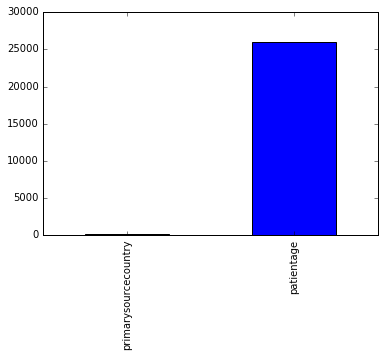

In [60]:
missing = ev_country_dat.isnull().sum()

missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

Dropping  nan values 

In [61]:
ev_country_dat  = ev_country_dat.dropna()

In [62]:
ev_country_dat.shape

(46339, 12)

In [63]:

ev_country_dat.head(5)

,primarysourcecountry,serious,seriousnesscongenitalanomali,seriousnessdeath,seriousnessdisabling,seriousnesshospitalization,seriousnesslifethreatening,seriousnessother,patientage,patientsex,reaction_outcome,same_country
0,JP,1,0,0,0,1,0,0,72,1,'6',1.0
3,CH,2,0,0,0,0,0,0,30,2,'1' '6',0.0
5,CO,1,0,0,0,1,0,1,27,2,'2',1.0
8,JP,1,0,0,0,1,0,0,50,1,'2' '6',1.0
10,DE,1,0,0,0,1,0,0,61,1,'1' '4',1.0


In [64]:
ev_country_dat.dtypes

primarysourcecountry             object
serious                          object
seriousnesscongenitalanomali     object
seriousnessdeath                 object
seriousnessdisabling             object
seriousnesshospitalization       object
seriousnesslifethreatening       object
seriousnessother                 object
patientage                       object
patientsex                       object
reaction_outcome                 object
same_country                    float64
dtype: object

In [65]:

ev_country_dat.same_country = ev_country_dat.same_country.astype('str')

Get the number of countries

In [66]:
n_countries = len(pd.Series(ev_country_dat['primarysourcecountry']).unique())

n_countries

110

In [67]:
ev_country_grp = ev_country_dat.groupby('primarysourcecountry')

In [68]:
#ev_country_grp.size()

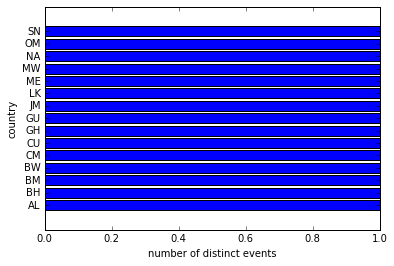

In [69]:

imp = ev_country_grp.size().values
names = ev_country_grp.size().keys()

imp, names = zip(*sorted(zip(imp,names)))



fig = plt.figure()

index = 15

plt.barh(np.arange(len(names))[0:index], imp[0:index], align='center')



plt.yticks(np.arange(len(names[0:index])),names[0:index])
plt.xlabel('number of distinct events')
plt.ylabel('country')




Top countries in terms of number of events reports

In [70]:
#np.arange(len(names[index:]))

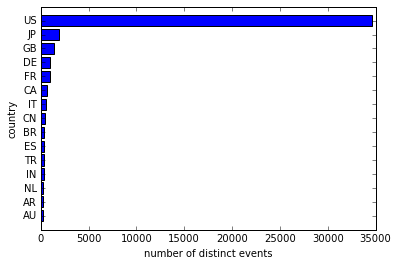

In [71]:
fig = plt.figure()

index =  n_countries-15

plt.barh(np.arange(len(names))[index:], imp[index:], align='center')


plt.yticks(np.arange(len(names))[index:],names[index:])
plt.xlabel('number of distinct events')
plt.ylabel('country')

In [72]:
print(names[index:],'\n', imp[index:])

('AU', 'AR', 'NL', 'IN', 'TR', 'ES', 'BR', 'CN', 'IT', 'CA', 'FR', 'DE', 'GB', 'JP', 'US') 
 (244, 275, 278, 286, 288, 343, 371, 487, 494, 610, 935, 994, 1406, 1850, 34641)


In [73]:
ev_country_dat.columns

Index(['primarysourcecountry', 'serious', 'seriousnesscongenitalanomali',
       'seriousnessdeath', 'seriousnessdisabling',
       'seriousnesshospitalization', 'seriousnesslifethreatening',
       'seriousnessother', 'patientage', 'patientsex', 'reaction_outcome',
       'same_country'],
      dtype='object')

Below, for each variable,  I compare the events reported  by country 

For a purpose of clarity, the investigation was limited to the top 8 countries among 110.

Investigating reaction outcome per country 

In [74]:

for i in range(index):
    
   ev_country_dat =  ev_country_dat.drop(ev_country_grp.get_group(names[i]).index)

In [75]:
ev_country_dat.shape

(43502, 12)

In [76]:
n_countries = len(pd.Series(ev_country_dat['primarysourcecountry']).unique())

n_countries

15

In [77]:
ev_country_grp = ev_country_dat.groupby('primarysourcecountry')

In [78]:
imp = ev_country_grp.size().values
names = ev_country_grp.size().keys()

imp, names = zip(*sorted(zip(imp,names)))



Reactionoutcome value is one of the following:

    1 = Recovered/resolved

    2 = Recovering/resolving

    3 = Not recovered/not resolved

    4 = Recovered/resolved with sequelae (consequent health issues)

    5 = Fatal

    6 = Unknown

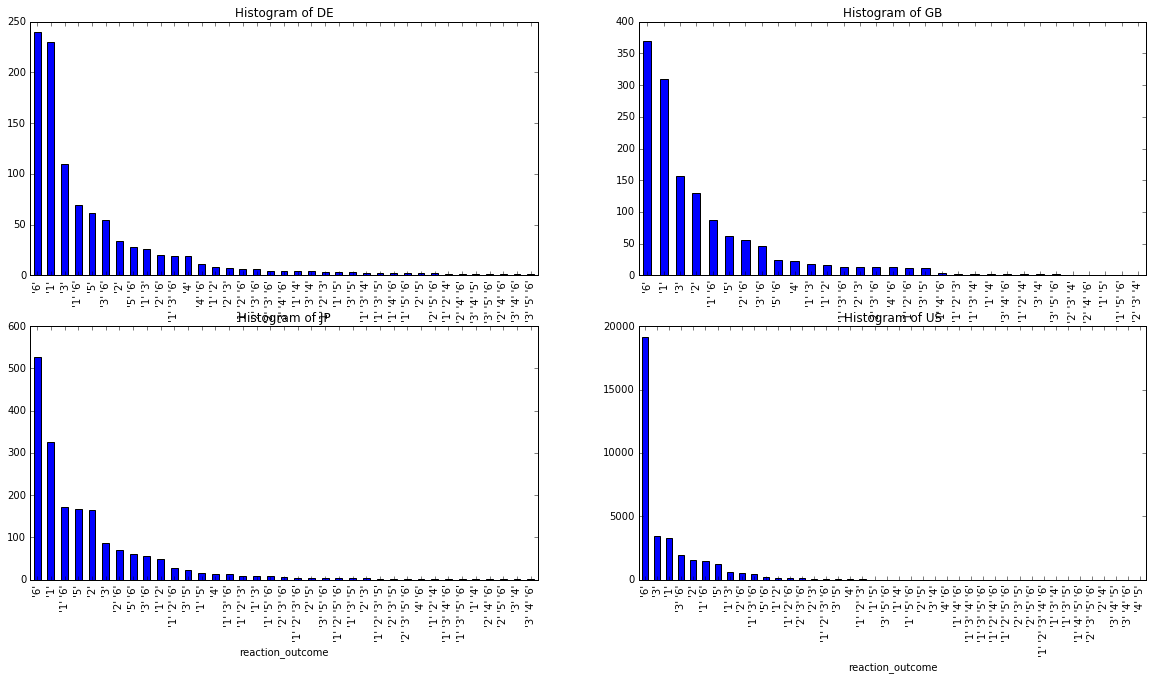

In [79]:


fig = plt.figure(figsize=(20, 10))

for i in range(11, n_countries):

    fig = plt.subplot(2,2,i-10)


    ev_country_grp.reaction_outcome.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    

The distributions look similar across the top 4 countries, reaction 6, 1 and 3 are the top reaction outcomes reported.

There are more reaction outcomes combination for US as the number of reports is significantly larger than in the other countries

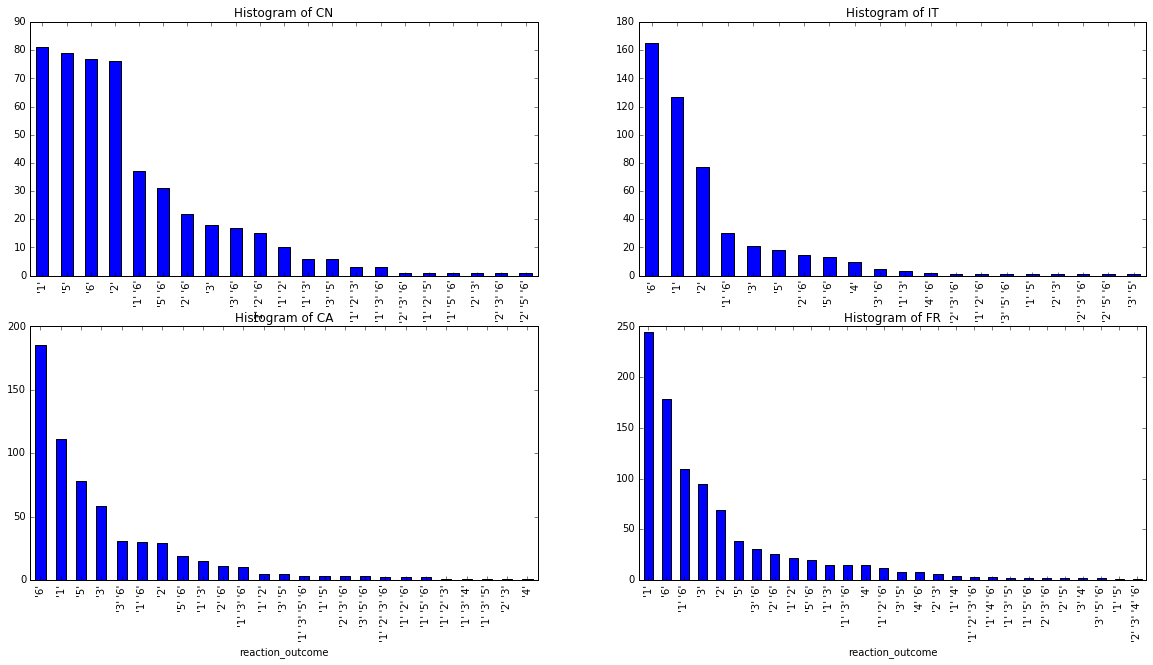

In [80]:
fig = plt.figure(figsize=(20, 10))

for i in range(7, n_countries-4):

    fig = plt.subplot(2,2,i-6)


    ev_country_grp.reaction_outcome.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    
  

Here we see a slight difference for countries CA and CN events, the reation outcome 5 is among the top 3 


Investigating the patient age and sex

patient.sex

0 = Unknown

1 = Male

2 = Female

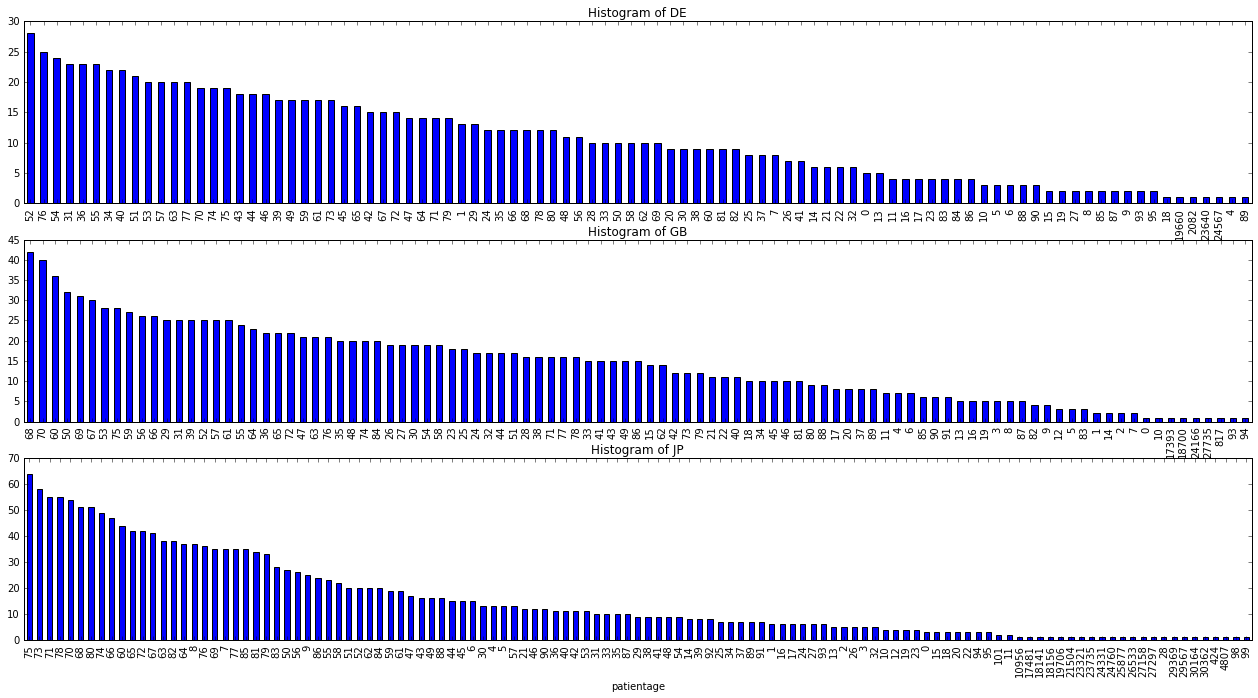

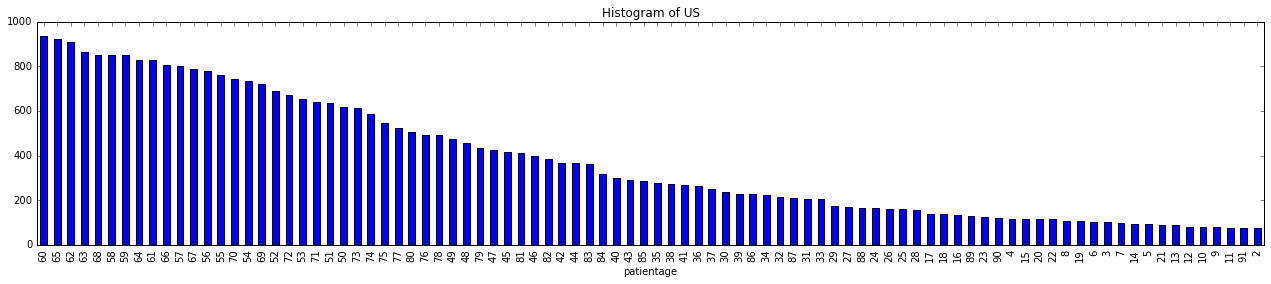

In [81]:
fig = plt.figure(figsize=(22, 15))

for i in range(11, n_countries-1):

    fig = plt.subplot(4,1,i-10)


    ev_country_grp.patientage.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    
 

fig = plt.figure(figsize=(22, 4))

ev_country_grp.patientage.value_counts()[names[i+1]][0:90].plot(kind="bar")

plt.title('Histogram of ' +names[i+1])

Again the distributions look similar, there are more reports for patients with age above 45 in the top countries. 

We can notice some outliers on the left part of the histograms. 

Also, it is known that japanese tend to live longer than in other countries, this can explained the prominence of some age category on the left side of the corresponding histogram

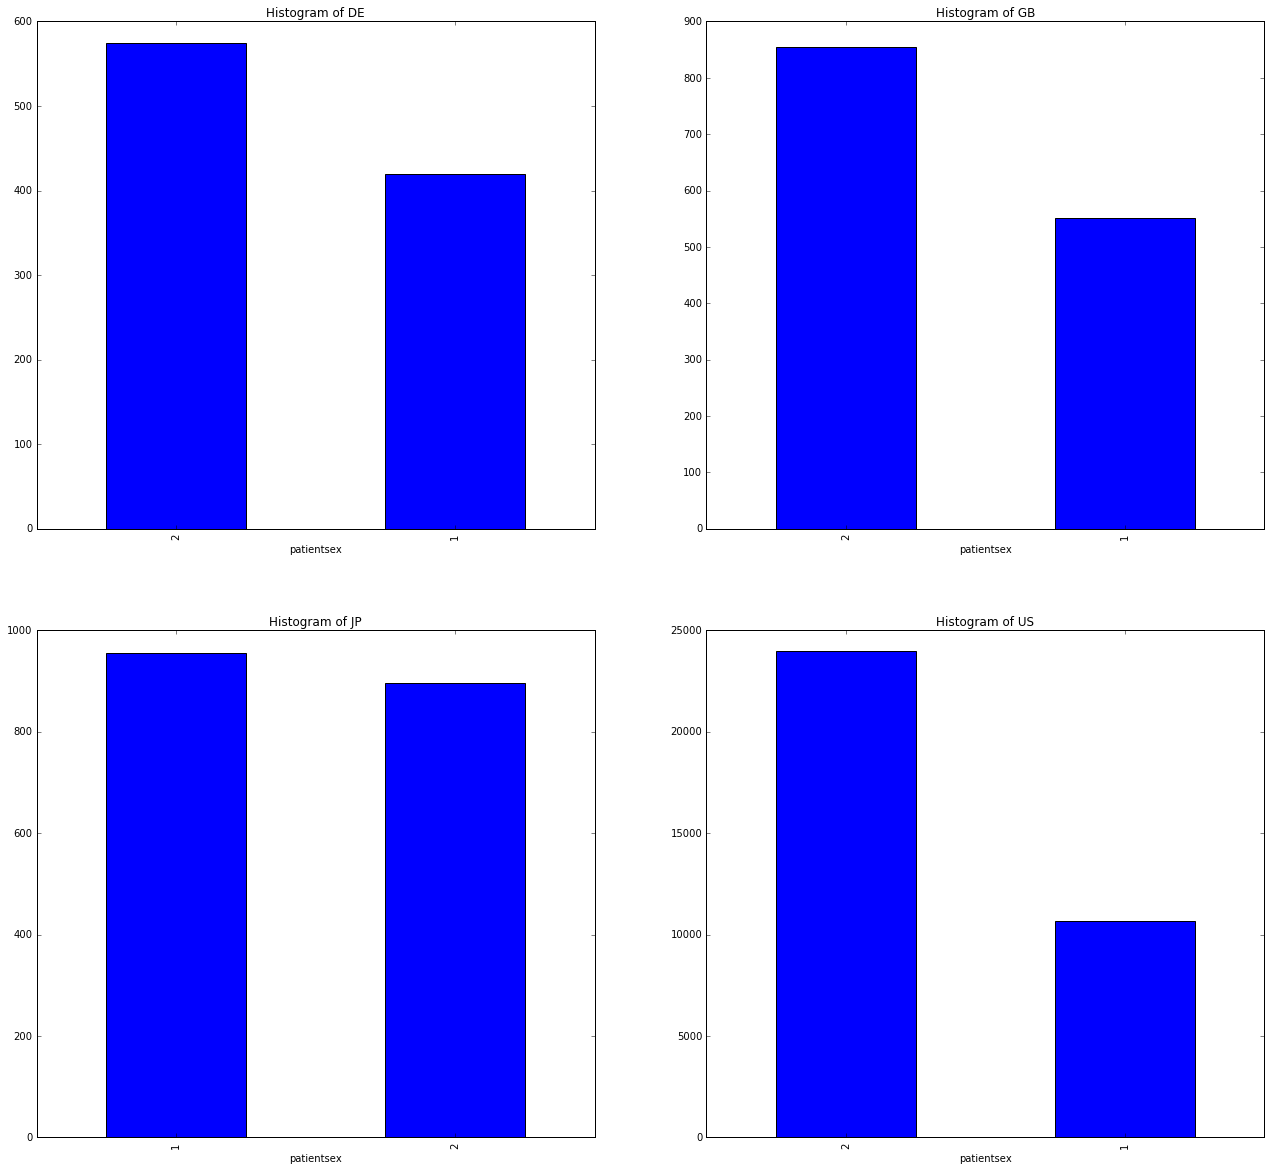

In [82]:
fig = plt.figure(figsize=(22, 20))

for i in range(11, n_countries):

    fig = plt.subplot(2,2,i-10)


    ev_country_grp.patientsex.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


Again similar distribution,  there is slightly more reports for women and this difference is prominent in US

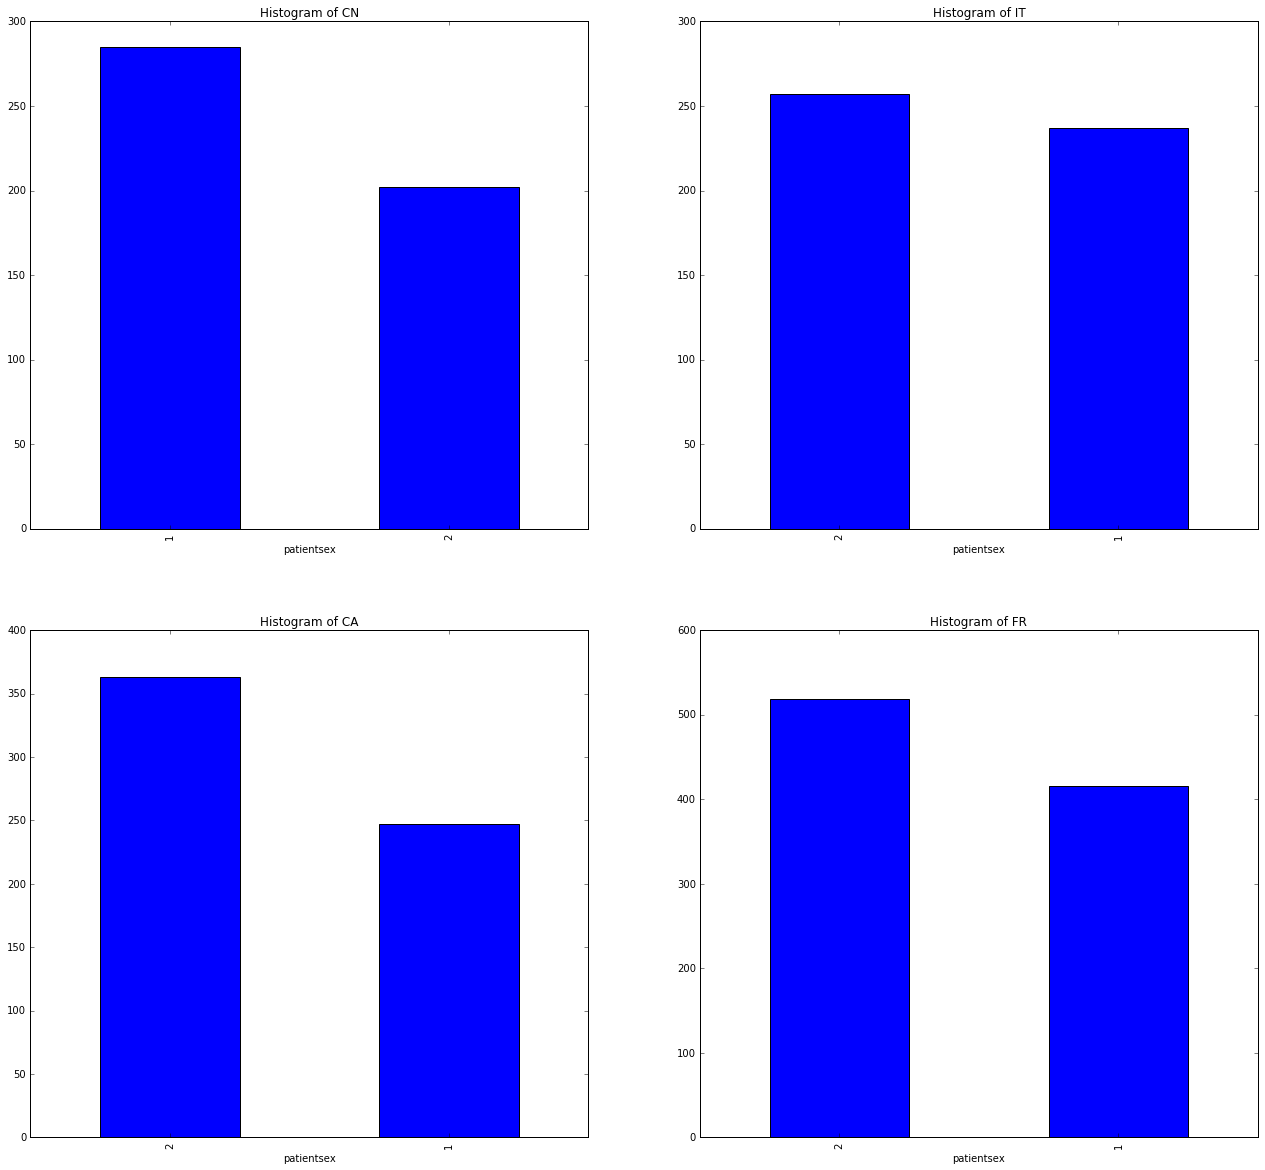

In [83]:
fig = plt.figure(figsize=(22, 20))

for i in range(7, n_countries-4):

    fig = plt.subplot(2,2,i-6)


    ev_country_grp.patientsex.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


Investigating if the country from which the report was sent is the same as the one where the event occurs

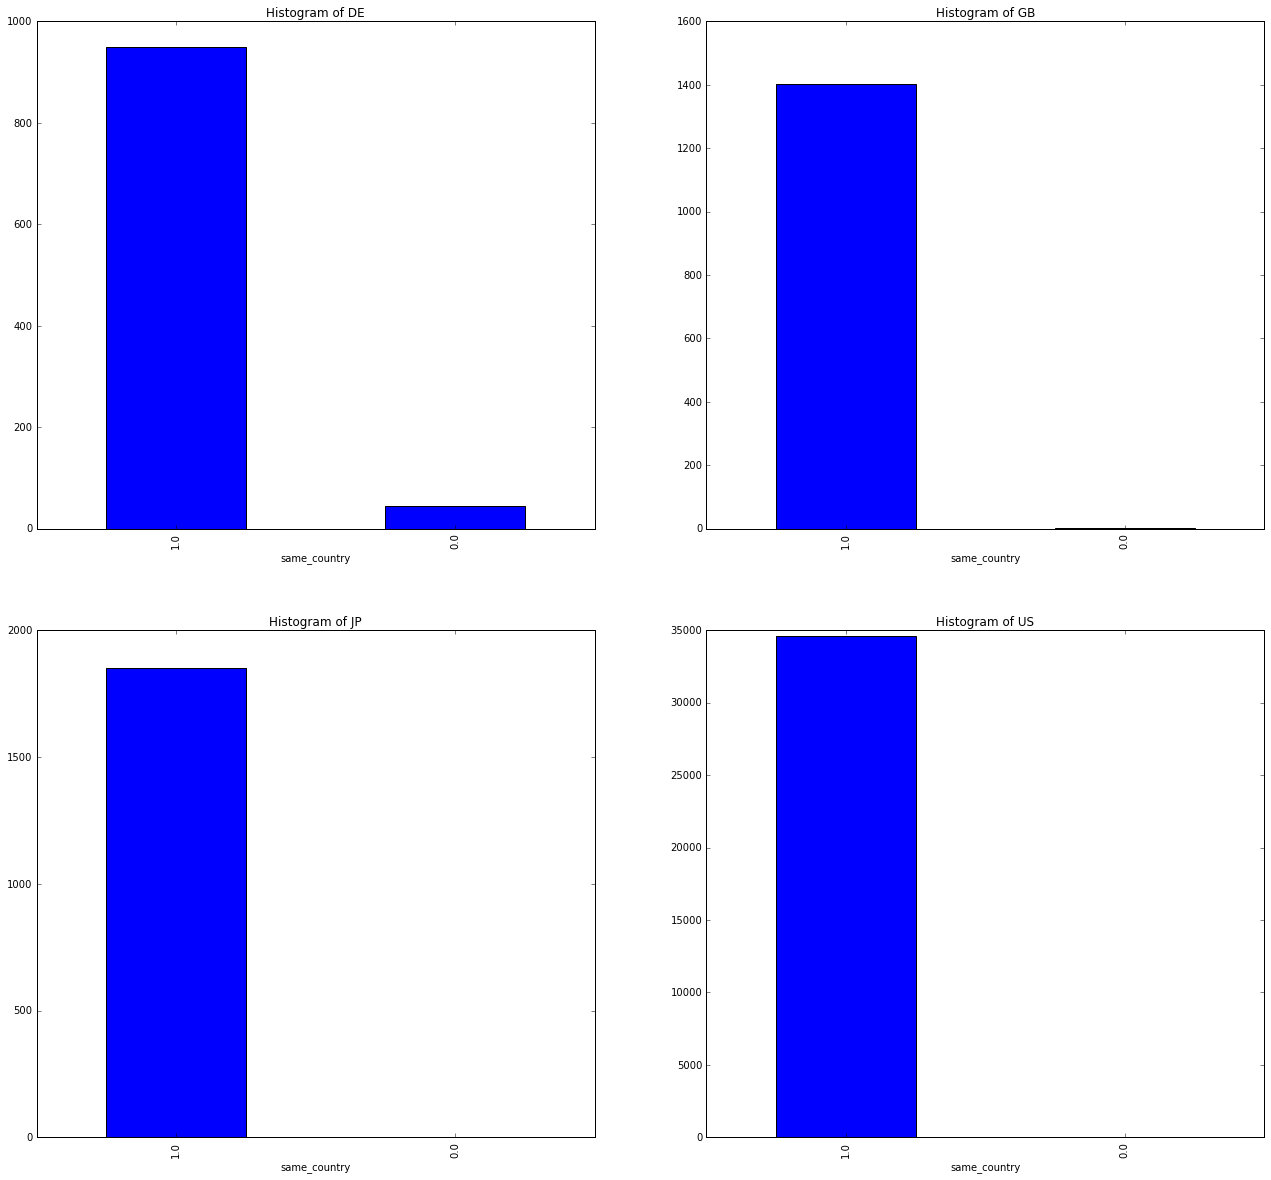

In [84]:
fig = plt.figure(figsize=(22, 20))

for i in range(11, n_countries):

    fig = plt.subplot(2,2,i-10)


    ev_country_grp.same_country.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    

plt.show()  

Deustchland tends to report more foreign events than the other countries

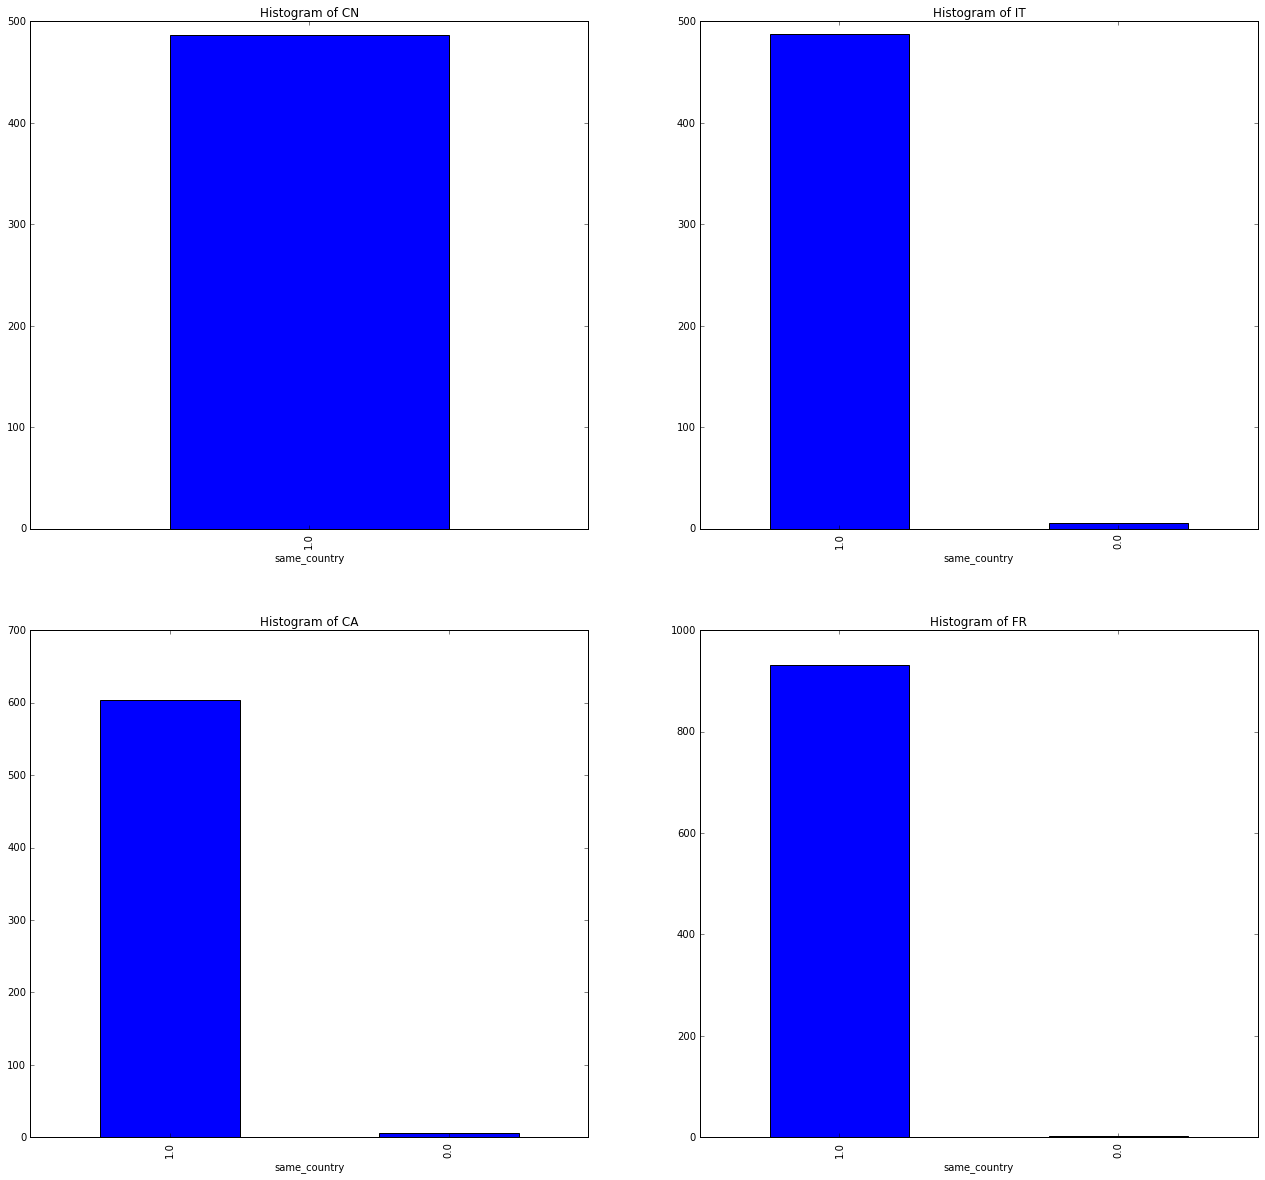

In [85]:
fig = plt.figure(figsize=(22, 20))

for i in range(7, n_countries-4):

    fig = plt.subplot(2,2,i-6)


    ev_country_grp.same_country.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


China has reported no foreign events

Investigating seriousness

From the data description we know the following: 

serious: 1 if the adverse event resulted in death, a life threatening condition, hospitalization, disability, congenital anomaly, or other serious condition

serious: 2 the adverse event did not result in any of the above

seriousnessdeath:  1 if the adverse event resulted in death, and absent otherwise.

seriousnessdisabling:  1 if the adverse event resulted in disability, and absent otherwise.

seriousnesshospitalization:  1 if the adverse event resulted in a hospitalization, and absent otherwise.

seriousnesslifethreatening:  1 if the adverse event resulted in a life threatening condition, and absent otherwise.

seriousnessother:  1 if the adverse event resulted in some other serious condition, and absent otherwise.

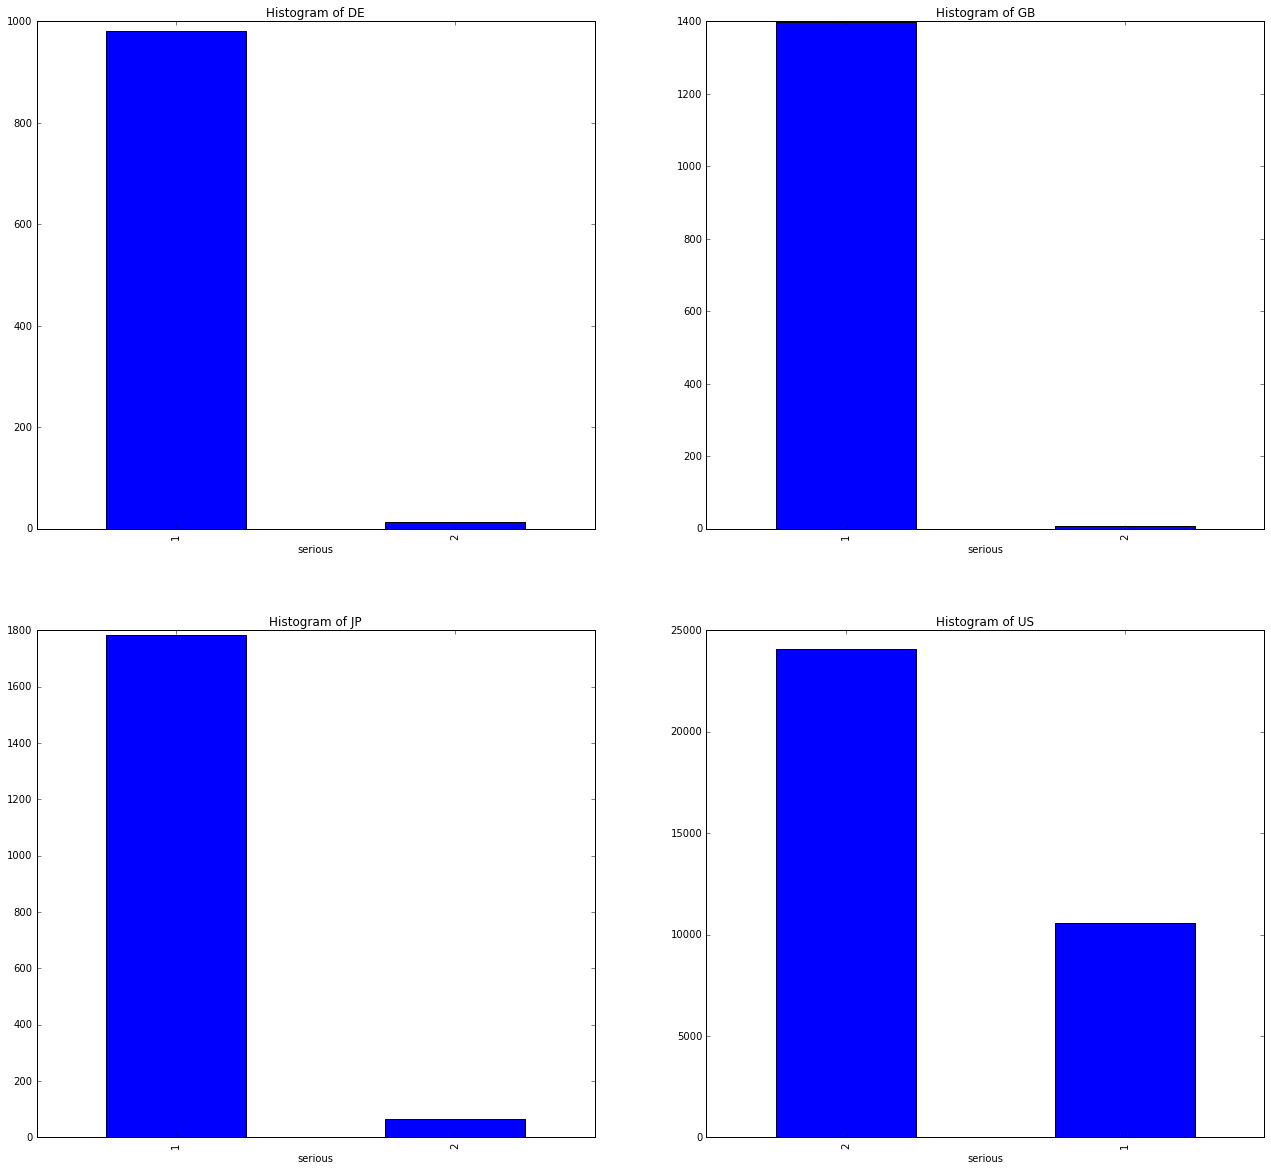

In [86]:


fig = plt.figure(figsize=(22, 20))

for i in range(11, n_countries):

    fig = plt.subplot(2,2,i-10)


    ev_country_grp.serious.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    

 

In US there is a higher proportion of serious events reported than in the other countries

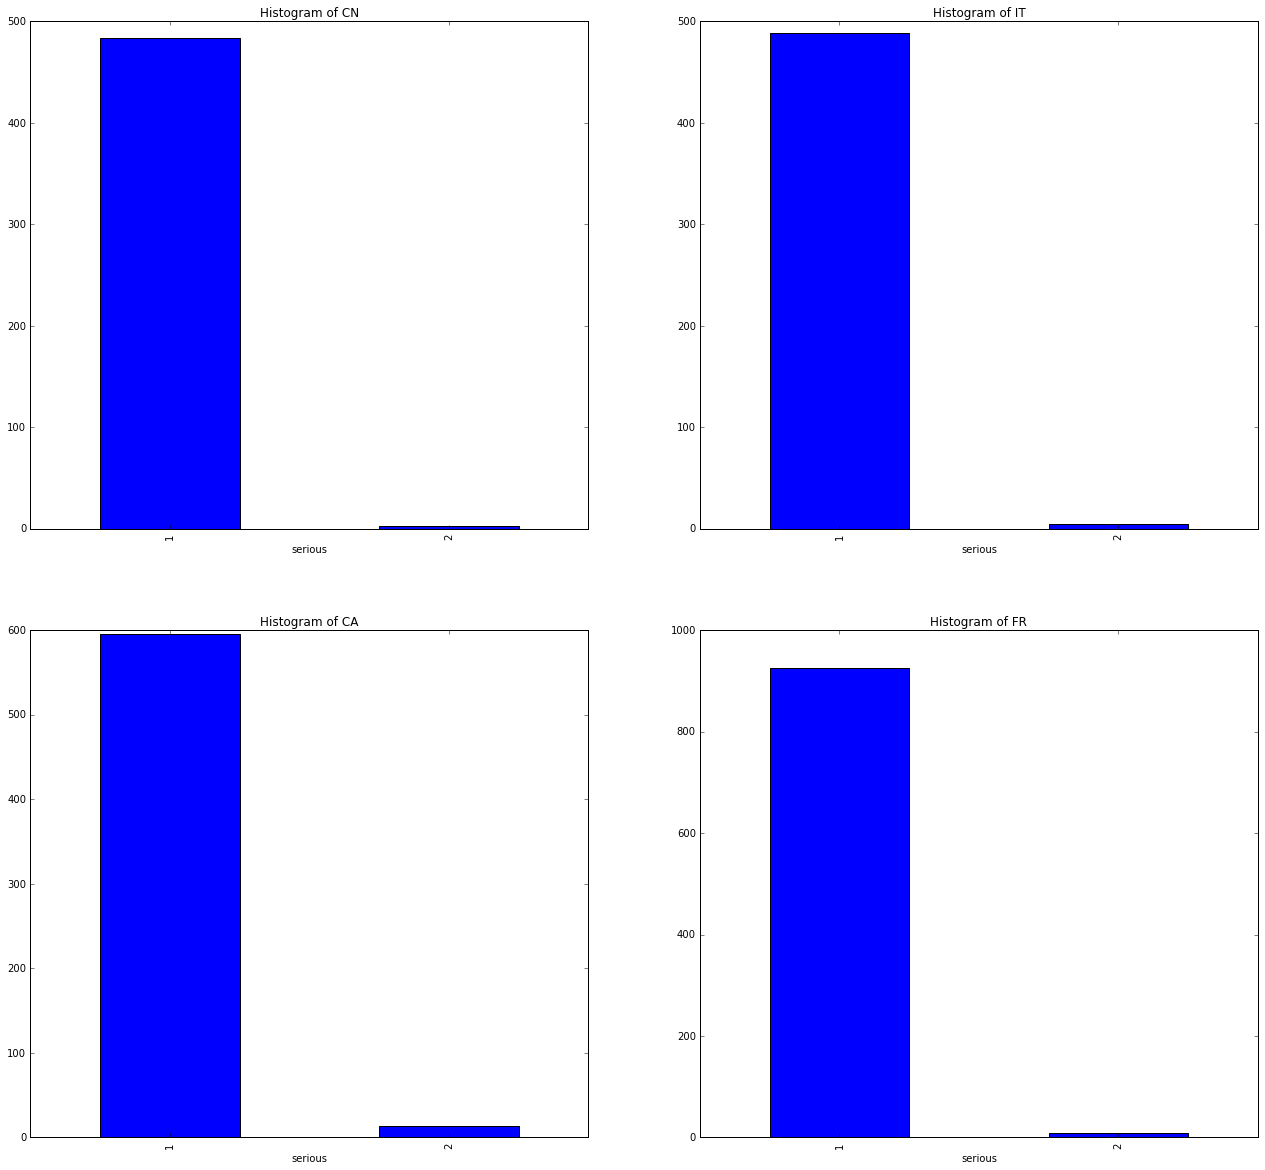

In [87]:
fig = plt.figure(figsize=(22, 20))

for i in range(7, n_countries-4):

    fig = plt.subplot(2,2,i-6)


    ev_country_grp.serious.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


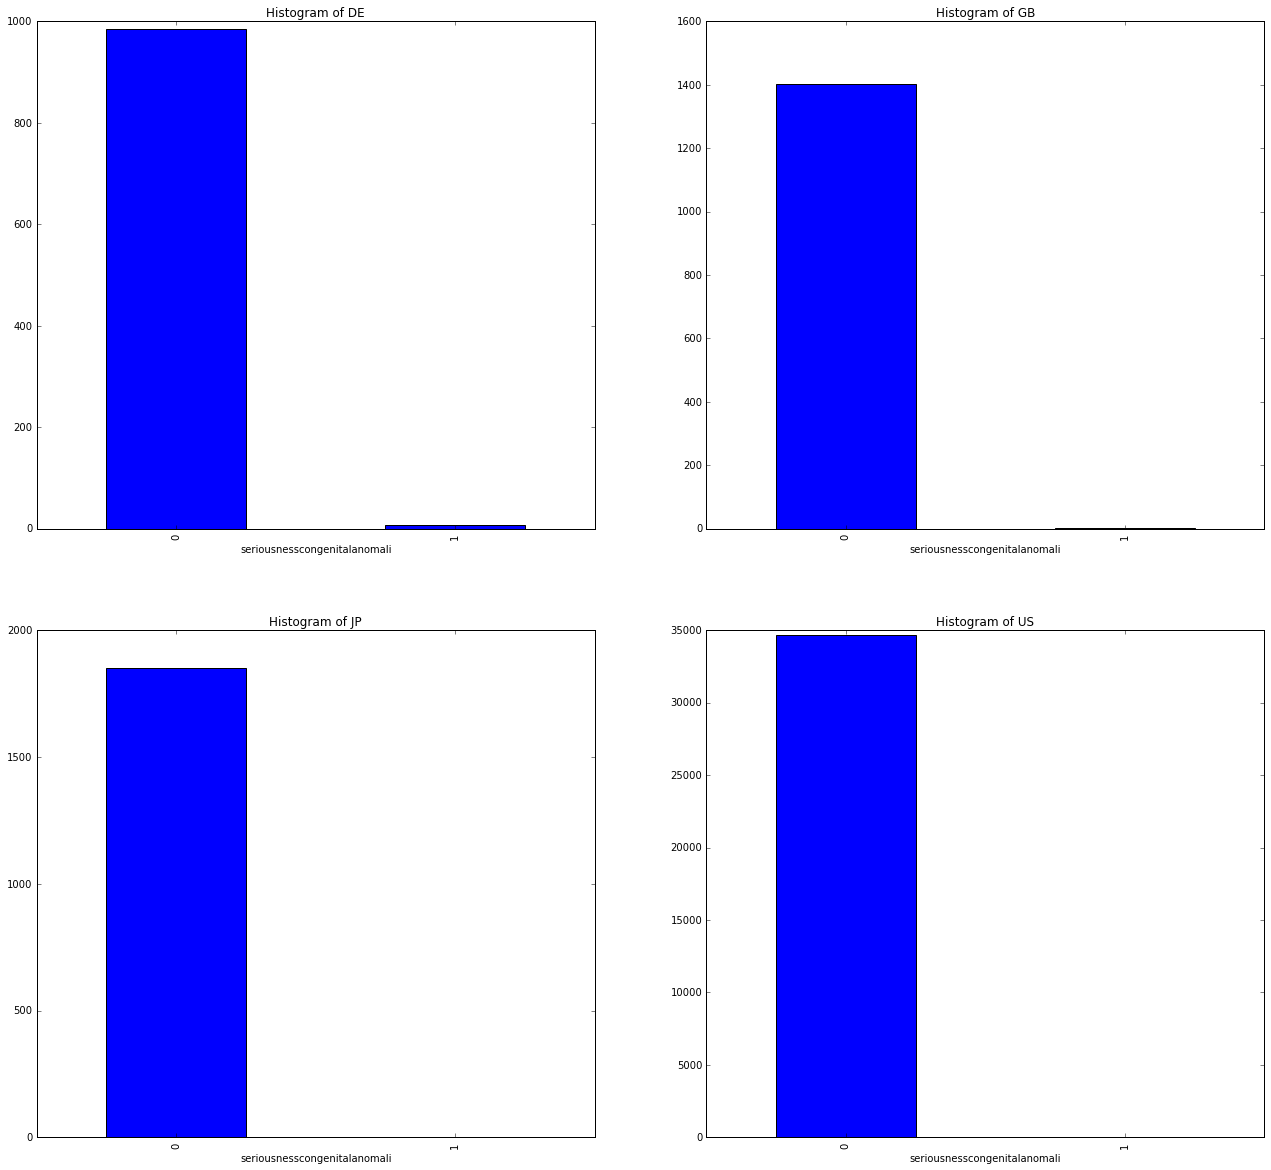

In [88]:
fig = plt.figure(figsize=(22, 20))

for i in range(11, n_countries):

    fig = plt.subplot(2,2,i-10)


    ev_country_grp.seriousnesscongenitalanomali.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


Events resulting in congenital anomalies are less reported

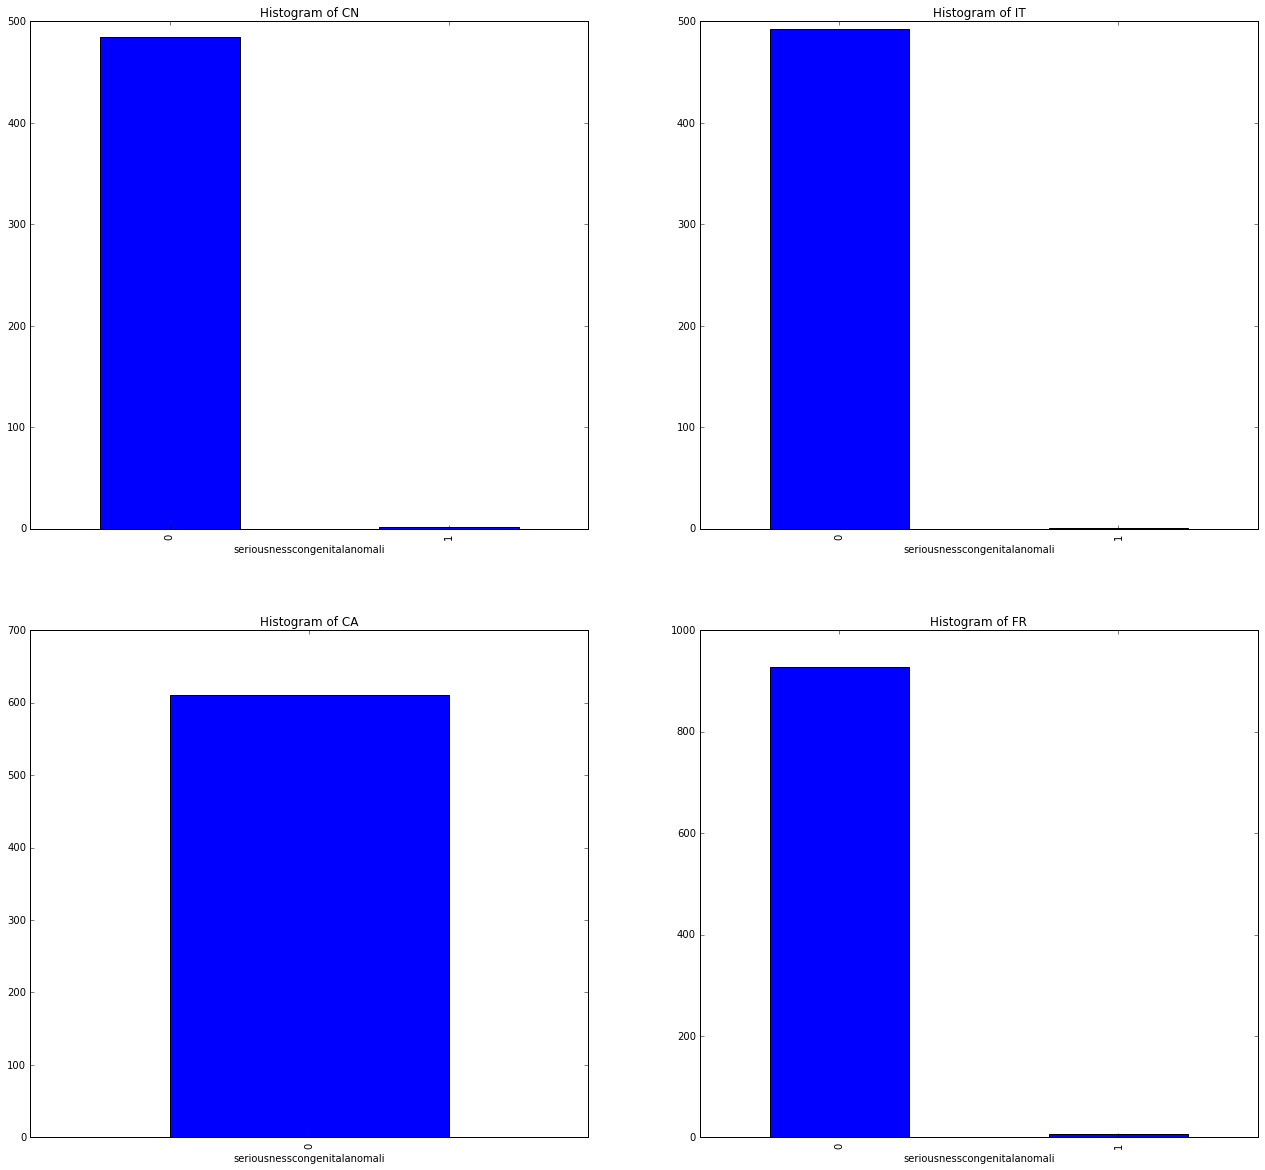

In [89]:
fig = plt.figure(figsize=(22, 20))

for i in range(7, n_countries-4):

    fig = plt.subplot(2,2,i-6)


    ev_country_grp.seriousnesscongenitalanomali.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    



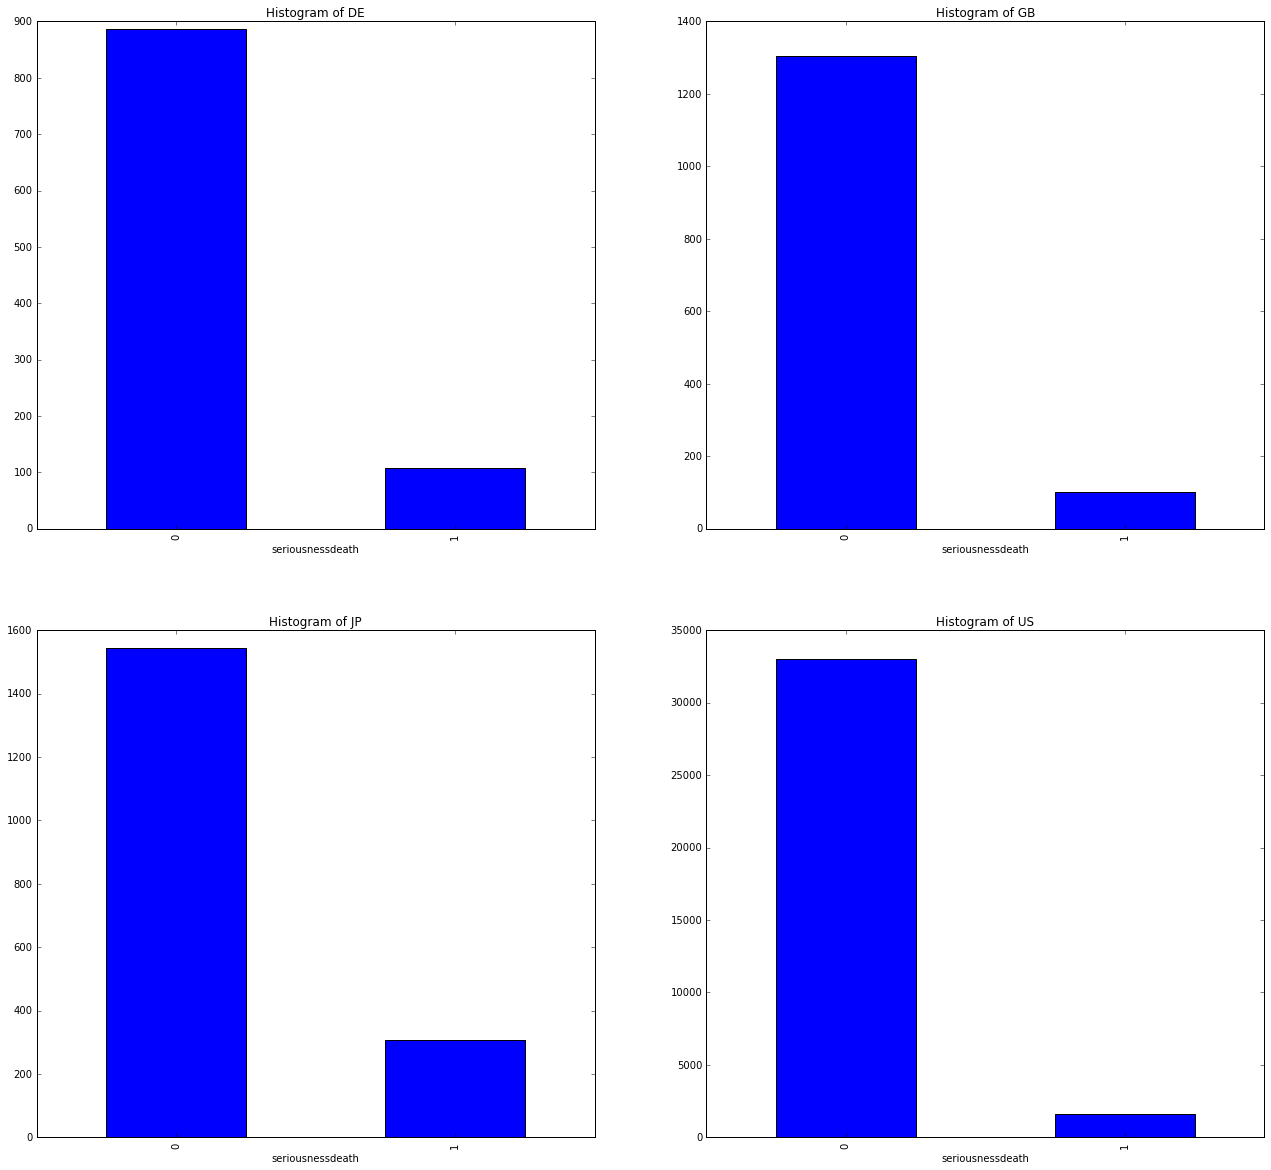

In [90]:
fig = plt.figure(figsize=(22, 20))

for i in range(11, n_countries):

    fig = plt.subplot(2,2,i-10)


    ev_country_grp.seriousnessdeath.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


Events resulting in the death of the patient are  less reported in the US

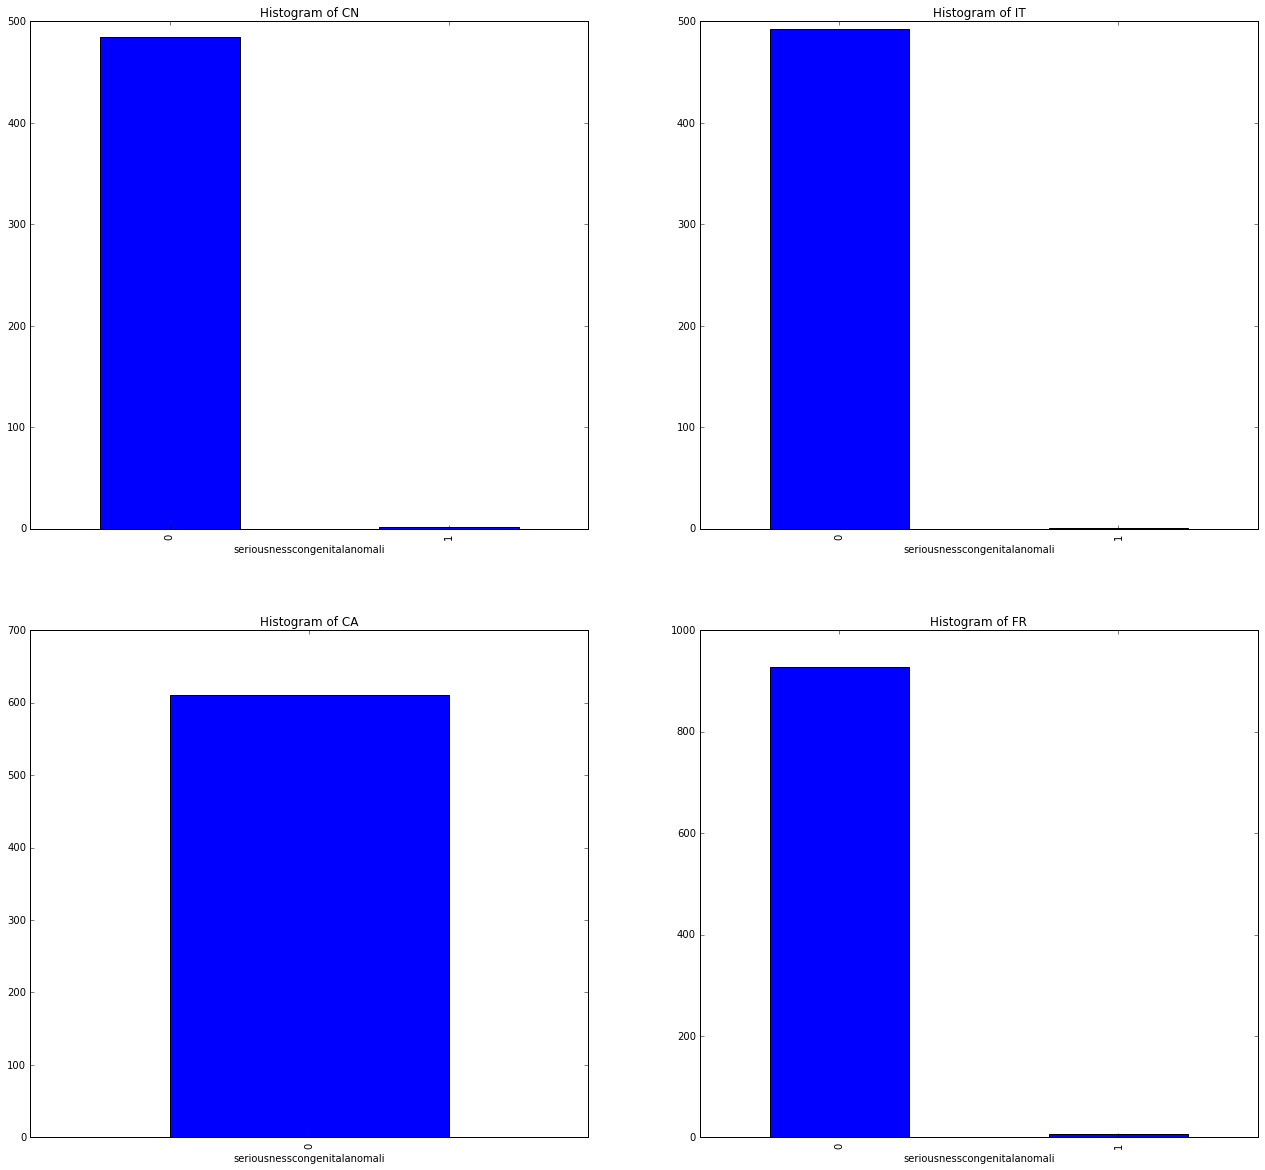

In [91]:
fig = plt.figure(figsize=(22, 20))

for i in range(7, n_countries-4):

    fig = plt.subplot(2,2,i-6)


    ev_country_grp.seriousnesscongenitalanomali.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


Same as US for CN, IT, CA and FR

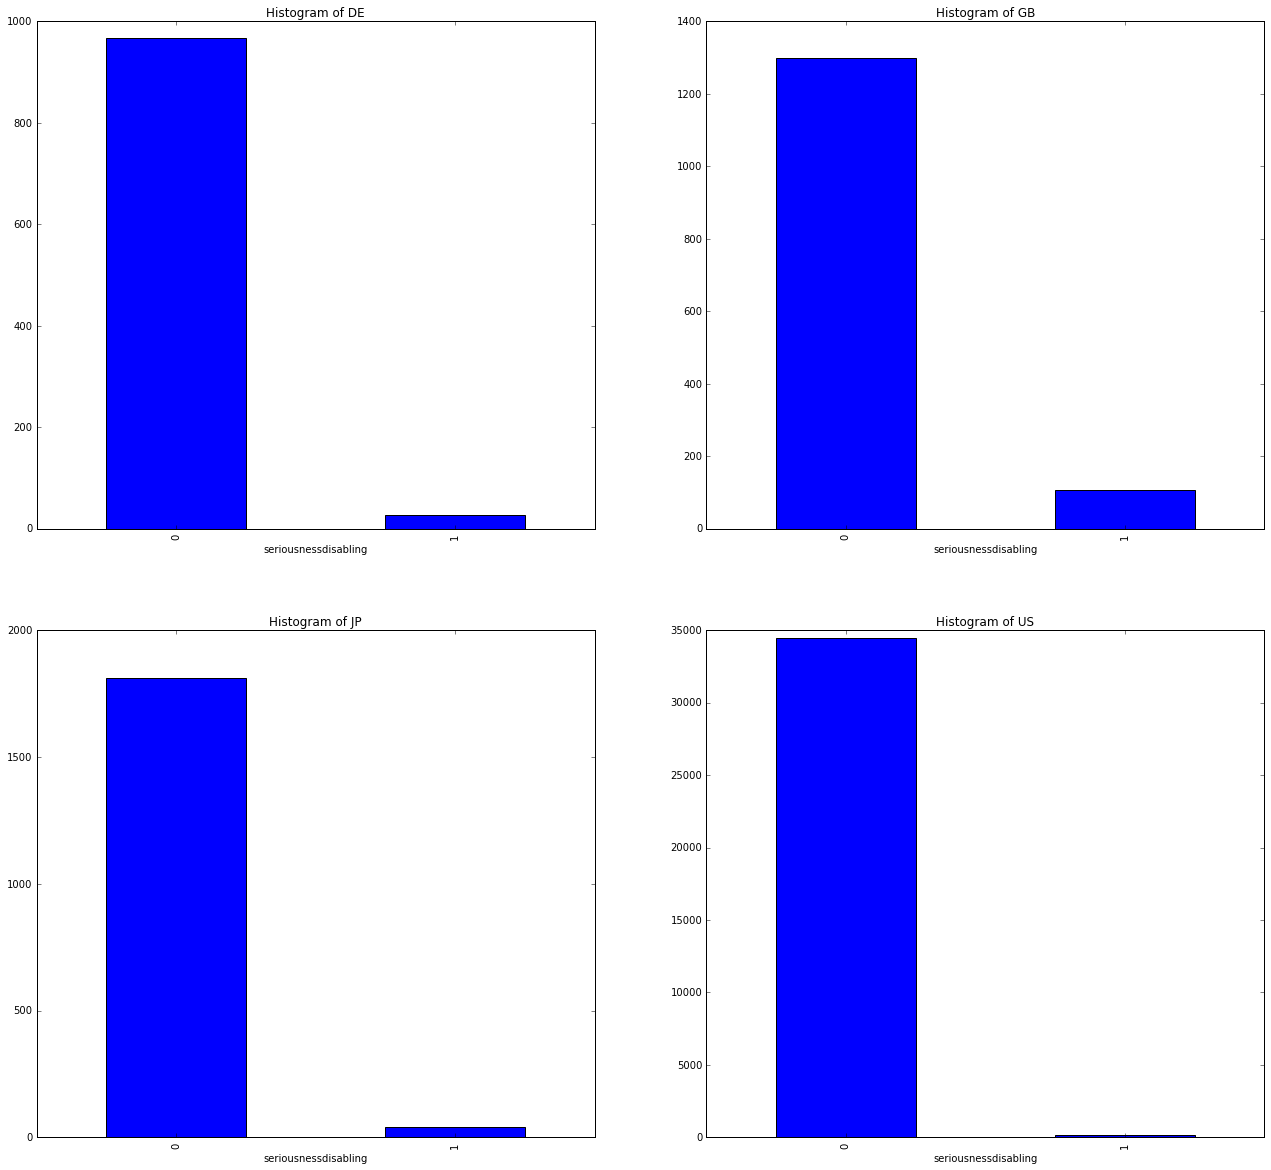

In [92]:
fig = plt.figure(figsize=(22, 20))

for i in range(11, n_countries):

    fig = plt.subplot(2,2,i-10)


    ev_country_grp.seriousnessdisabling.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    



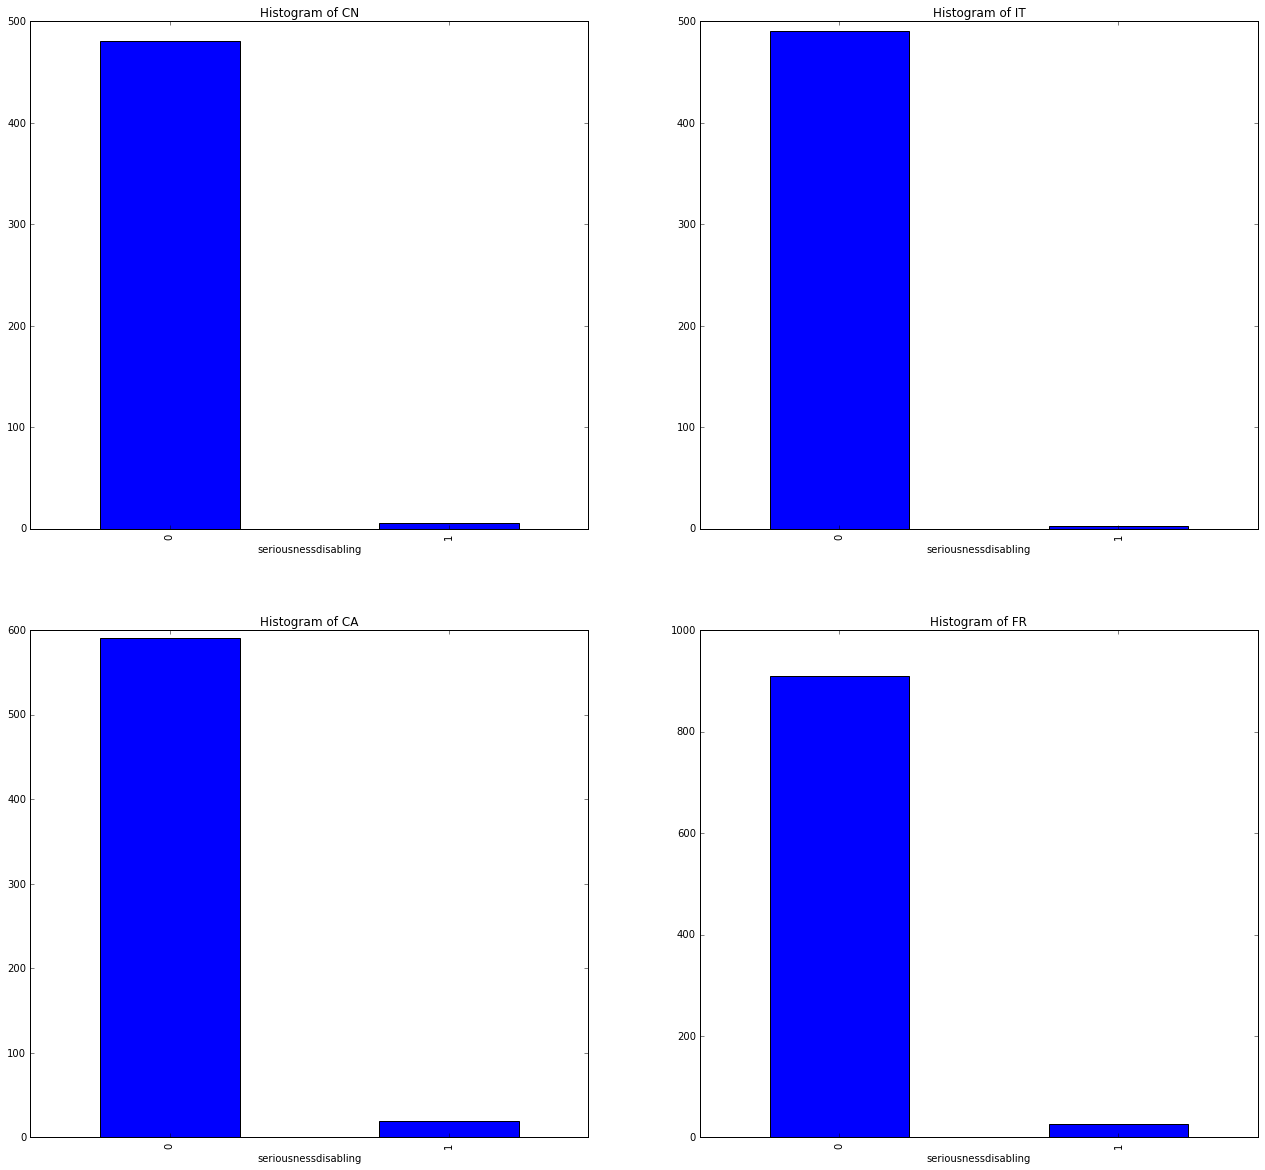

In [93]:
fig = plt.figure(figsize=(22, 20))

for i in range(7, n_countries-4):

    fig = plt.subplot(2,2,i-6)


    ev_country_grp.seriousnessdisabling.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    



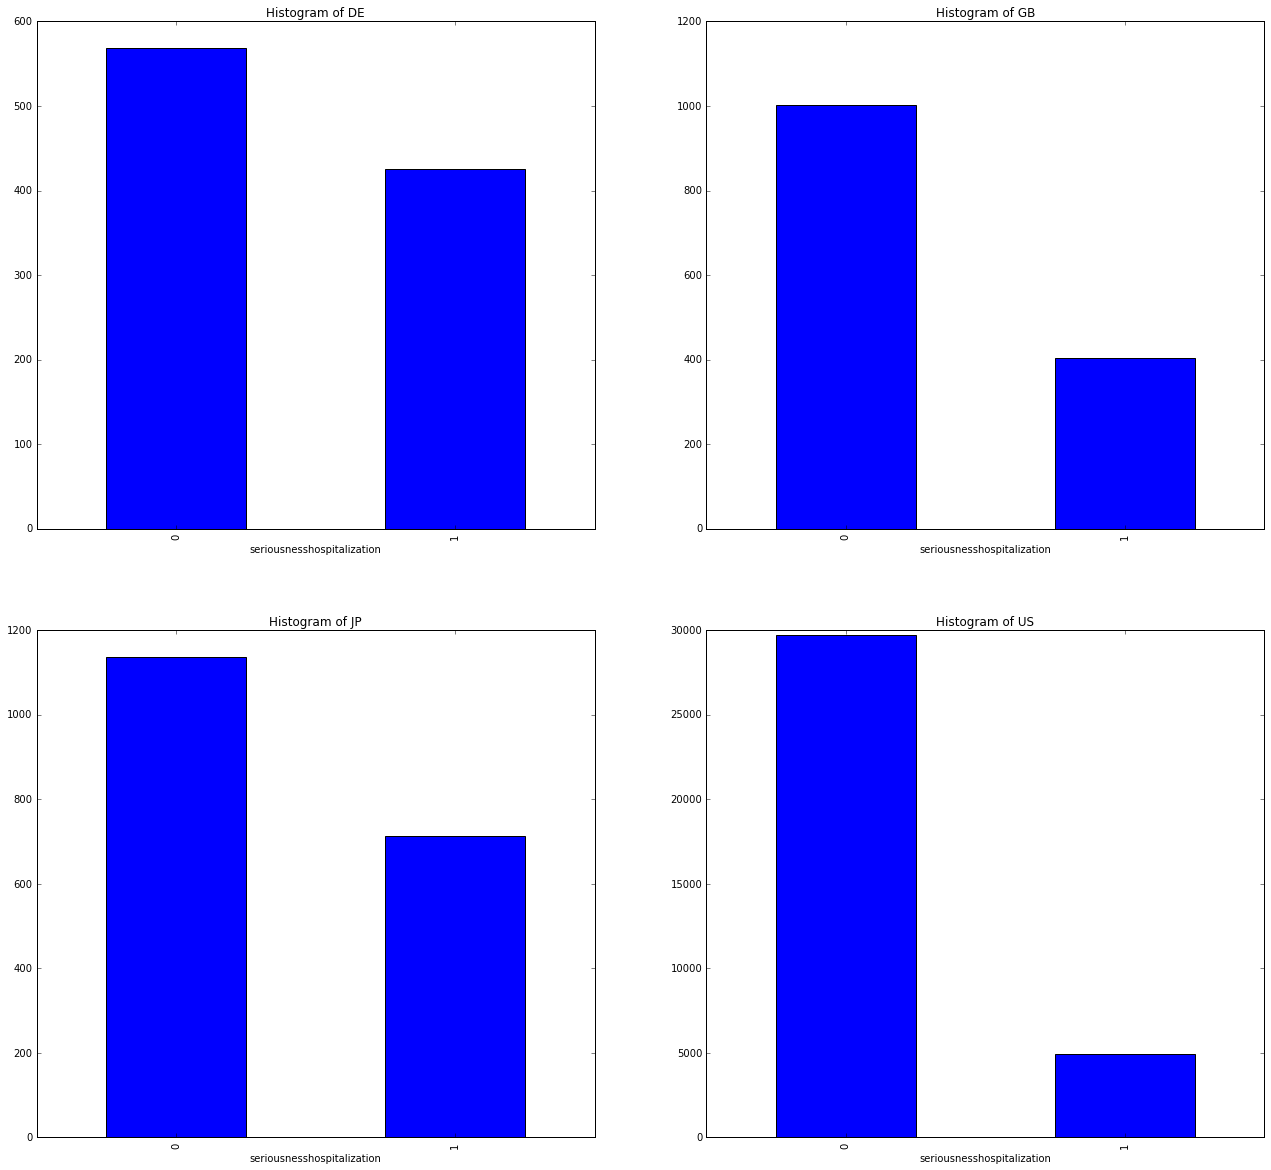

In [94]:
fig = plt.figure(figsize=(22, 20))

for i in range(11, n_countries):

    fig = plt.subplot(2,2,i-10)


    ev_country_grp.seriousnesshospitalization.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    



In US events resulting in hospitalisation are less reported than in other countries

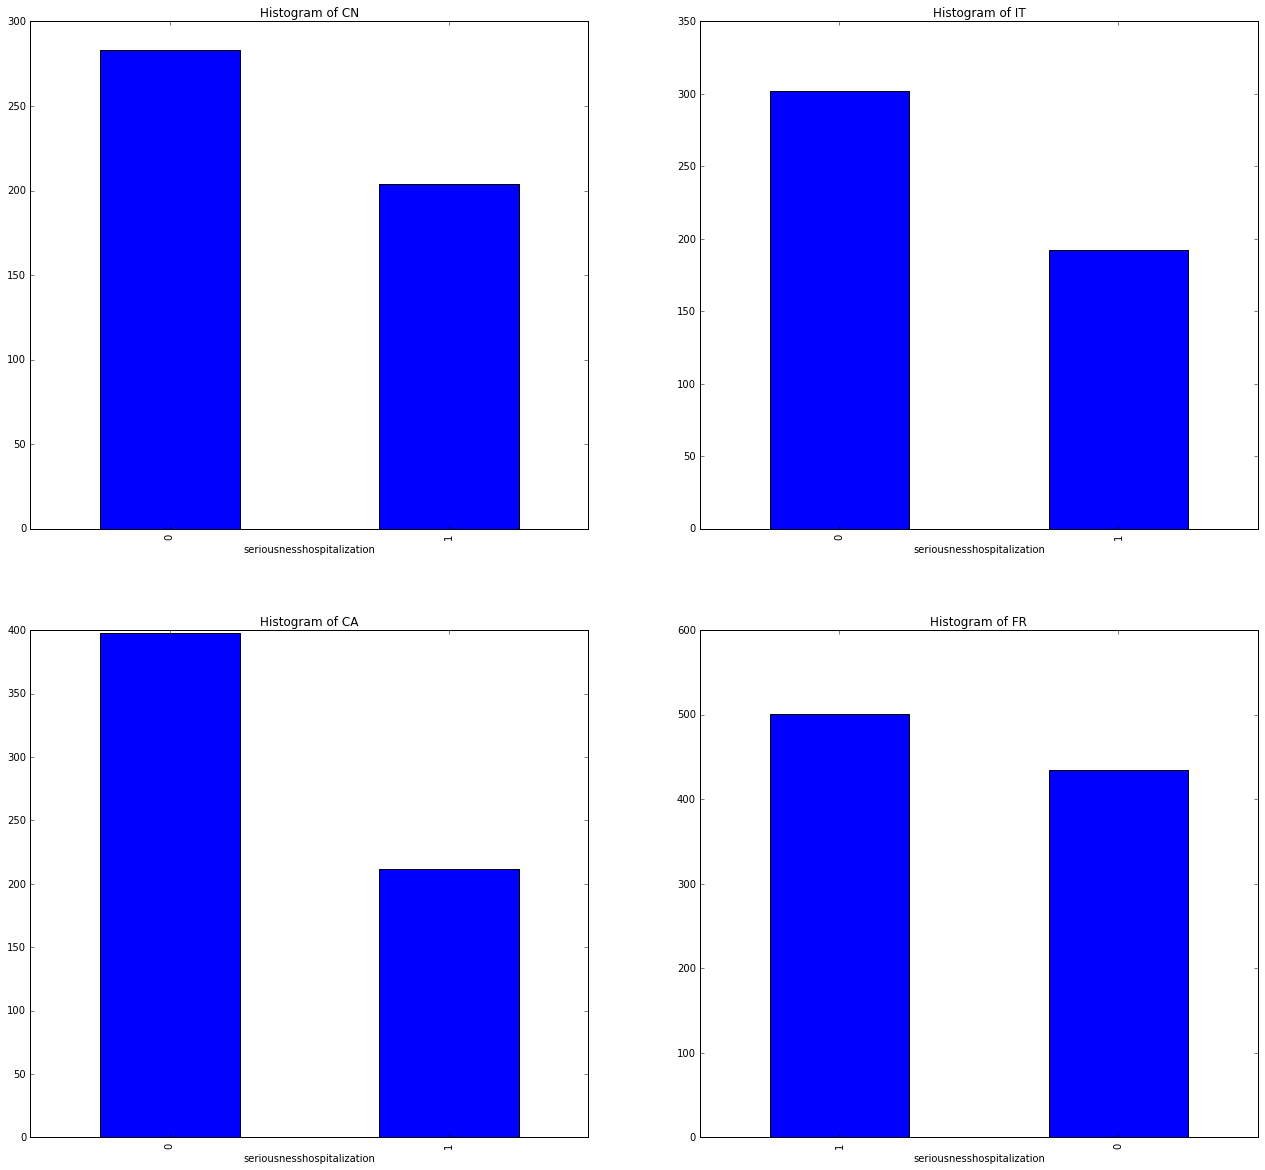

In [95]:
fig = plt.figure(figsize=(22, 20))

for i in range(7, n_countries-4):

    fig = plt.subplot(2,2,i-6)


    ev_country_grp.seriousnesshospitalization.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


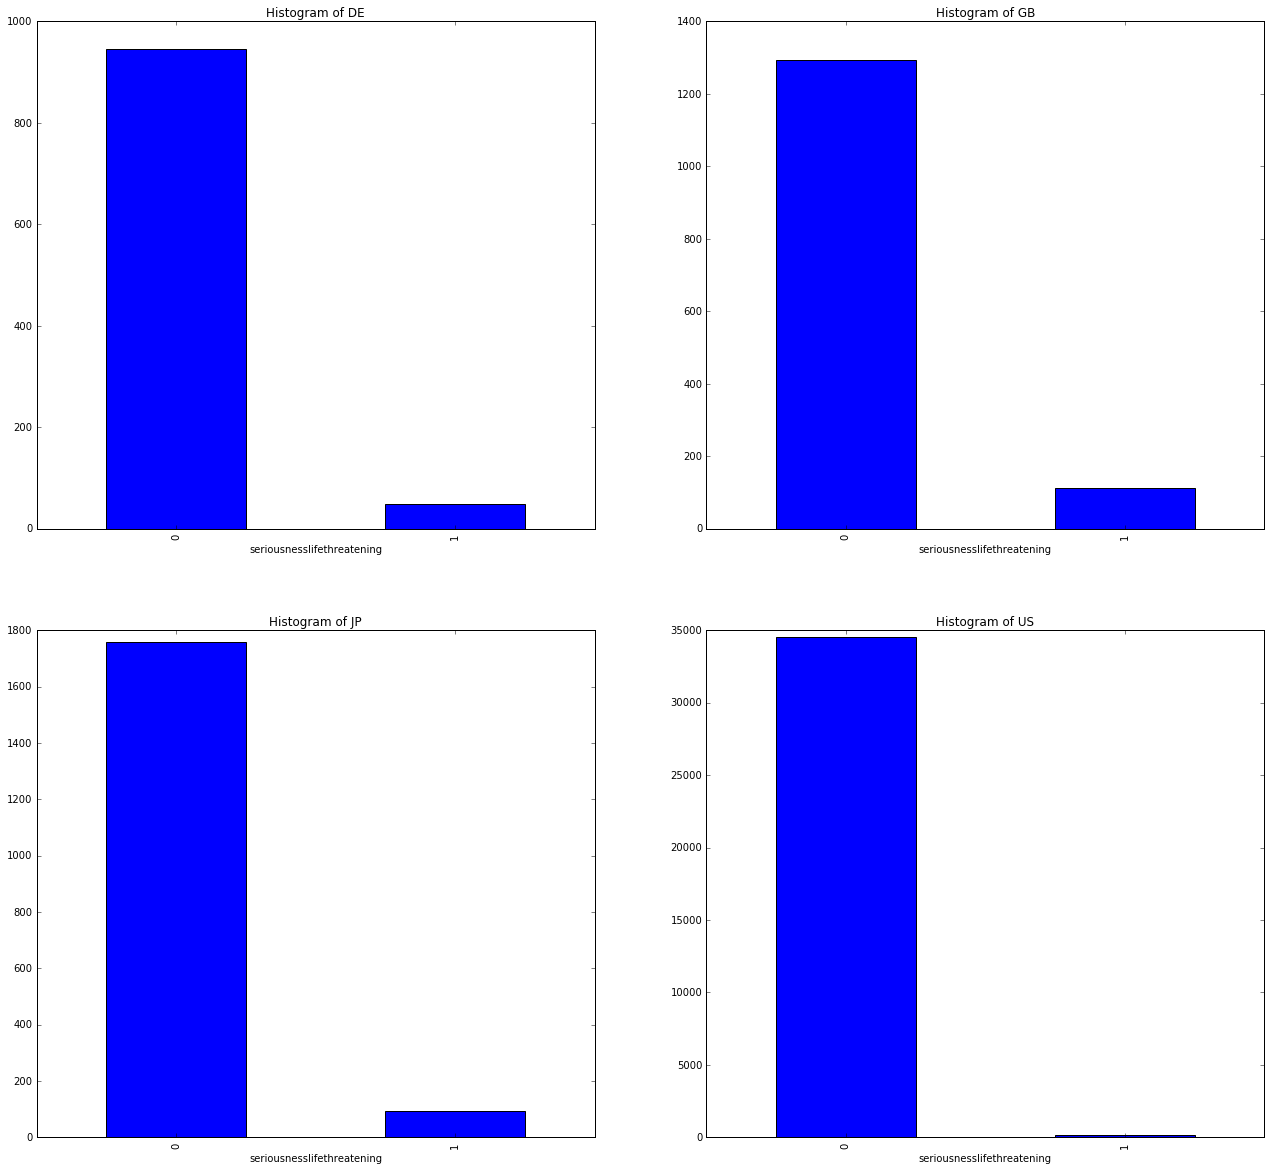

In [96]:
fig = plt.figure(figsize=(22, 20))

for i in range(11, n_countries):

    fig = plt.subplot(2,2,i-10)


    ev_country_grp.seriousnesslifethreatening.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


In US events resulting in lifethreatening are less reported than in other countries

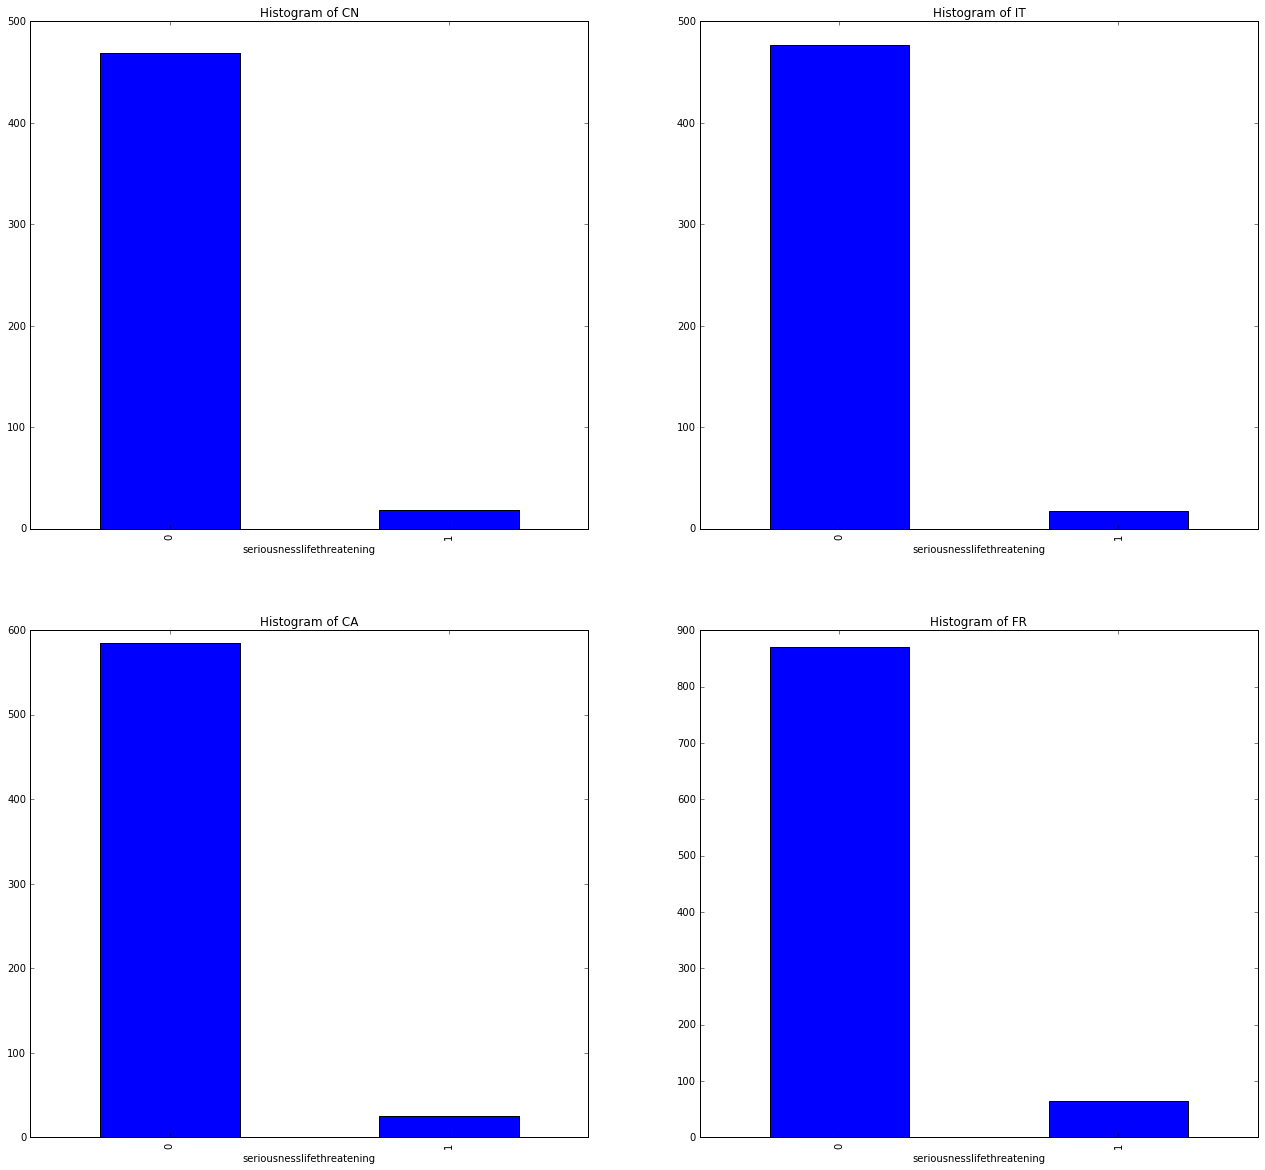

In [97]:
fig = plt.figure(figsize=(22, 20))

for i in range(7, n_countries-4):

    fig = plt.subplot(2,2,i-6)


    ev_country_grp.seriousnesslifethreatening.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


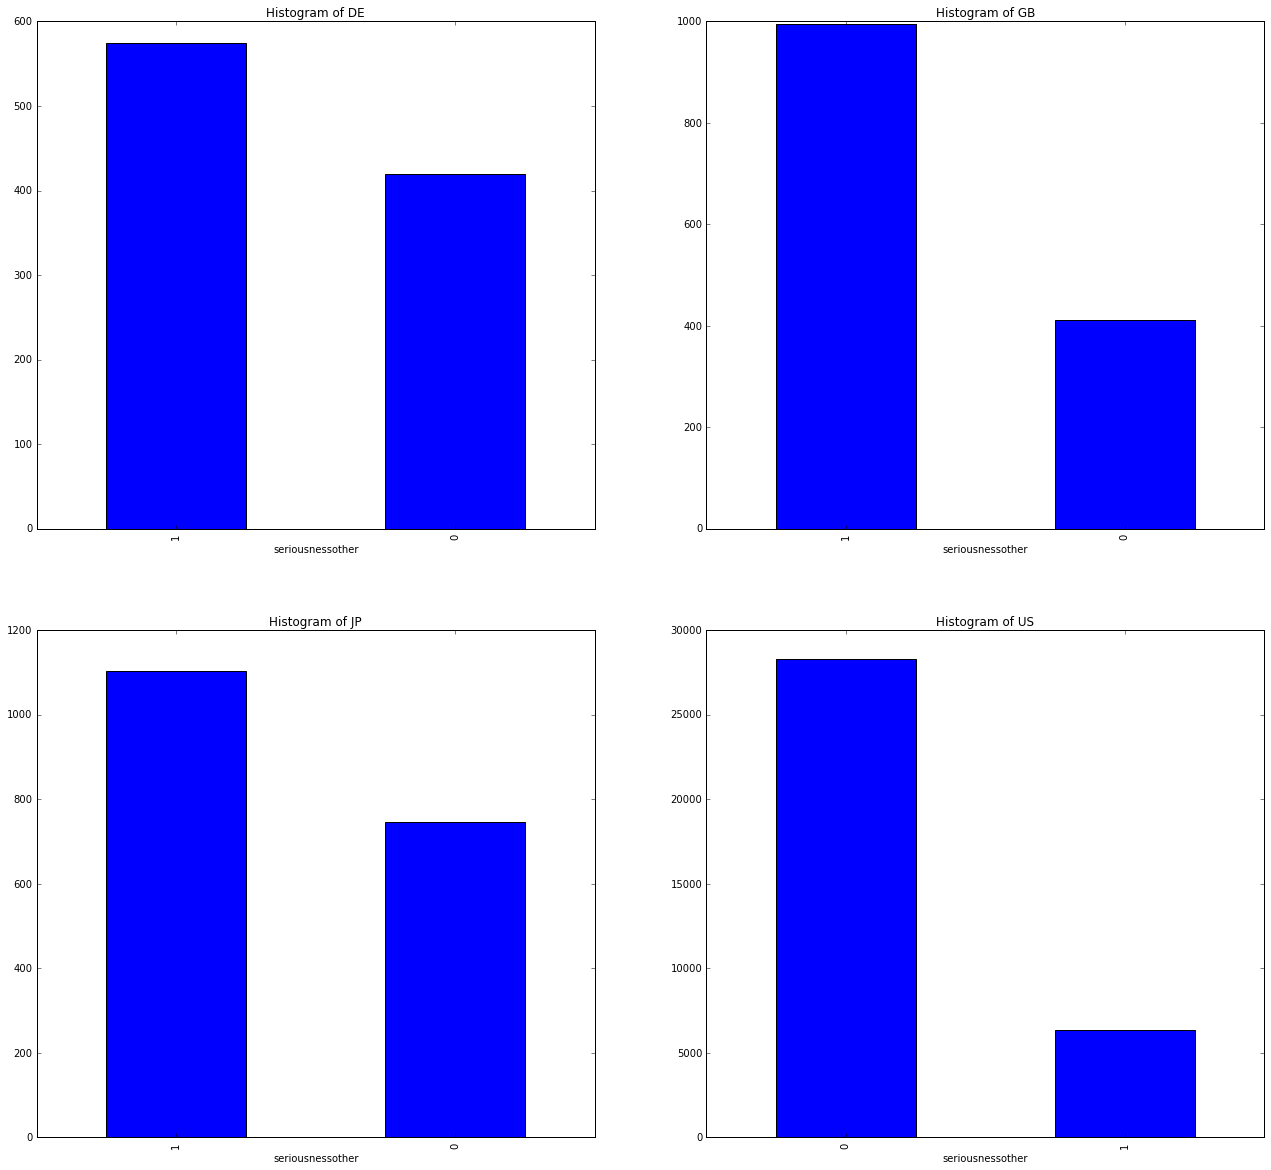

In [98]:


fig = plt.figure(figsize=(22, 20))

for i in range(11, n_countries):

    fig = plt.subplot(2,2,i-10)


    ev_country_grp.seriousnessother.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


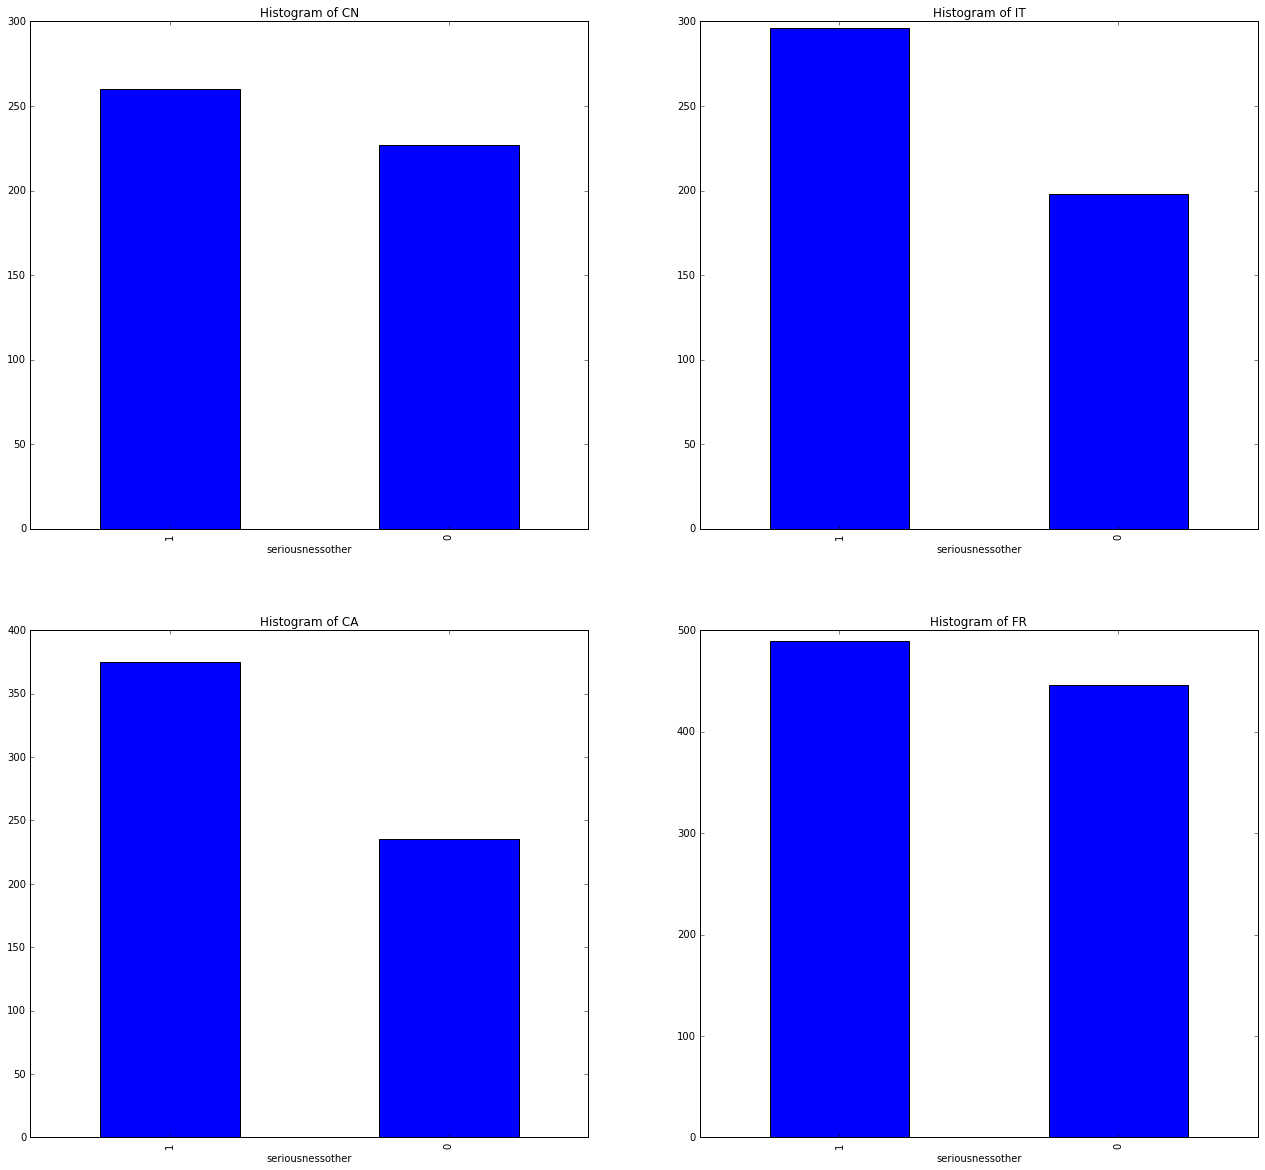

In [99]:
fig = plt.figure(figsize=(22, 20))

for i in range(7, n_countries-4):

    fig = plt.subplot(2,2,i-6)


    ev_country_grp.seriousnessother.value_counts()[names[i]].plot(kind="bar")
    plt.title('Histogram of ' +names[i])
    


Again US is clearly different from the other top countries. 


Even though there were some difference noticed among adverse events from different countries (especially US, CN and DE), the overall trend is conserved. Therefore we can conclude that the adverse events reported looks quite similar across different countries. 


Possible things to do is to bin the age categories into just two or three categories and make the same comparisons.
